In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy = True 

#Quitamos la anotación cientifica
pd.options.display.float_format = '{:15.2f}'.format
sns.set_style('darkgrid')

In [2]:
df = pd.read_pickle('../Datos/df.pickle')
df.head()

planta  mes  dia  hora  minuto        sensor_id     irradiacion  \
fecha                                                                        
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   

                t_ambiente        t_modulo      inverter_id           kw_dc  \
fecha                                                                         
2020-05-15           25.18           22.86  1BY6WEcLGh8j5v7            0.00   
2020-05-15           25.18           22.86  1IF53ai7Xc0U56Y            0.00   
2020-05-15           25.18           22.86  3PZuoBAID5Wc2HD            0.00   
2020-05-15           25.18           22.86  7JYdWkrLSPkdwr4            0.00   
2020-05-15           25.18           22.86  McdE0feGgRqW7Ca            0.00   

                     kw_ac      eficiencia          kw_dia        kw_total  
fecha                                                                       
2020-05-15            0.00            0.00            0.00      6259559.00  
2020-05-15            0.00            0.00            0.00      6183645.00  
2020-05-15            0.00            0.00            0.00      6987759.00  
2020-05-15            0.00            0.00            0.00      7602960.00  
2020-05-15            0.00            0.00            0.00      7158964.00

In [3]:
df_dia = pd.read_pickle('../Datos/df_dia.pickle')
df_dia.head()

planta      inverter_id  irradiacion_min  irradiacion_mean  \
fecha                                                                   
2020-05-15     p1  1BY6WEcLGh8j5v7             0.00              0.20   
2020-05-16     p1  1BY6WEcLGh8j5v7             0.00              0.21   
2020-05-17     p1  1BY6WEcLGh8j5v7             0.00              0.24   
2020-05-18     p1  1BY6WEcLGh8j5v7             0.00              0.16   
2020-05-19     p1  1BY6WEcLGh8j5v7             0.00              0.19   

            irradiacion_max  t_ambiente_min  t_ambiente_mean  t_ambiente_max  \
fecha                                                                          
2020-05-15             0.89           22.04            27.43           34.43   
2020-05-16             0.81           21.50            26.78           32.52   
2020-05-17             1.00           21.21            26.69           35.25   
2020-05-18             0.97           20.96            23.85           28.37   
2020-05-19             0.84           22.39            25.34           30.37   

              t_modulo_min   t_modulo_mean  ...       kw_dc_sum  \
fecha                                       ...                   
2020-05-15           20.29           32.58  ...       235340.70   
2020-05-16           19.59           31.86  ...       256629.88   
2020-05-17           20.38           32.74  ...       288039.82   
2020-05-18           19.48           27.81  ...       204030.30   
2020-05-19           20.06           29.73  ...       232277.27   

                 kw_ac_min      kw_ac_mean       kw_ac_max       kw_ac_sum  \
fecha                                                                        
2020-05-15            0.00          247.81         1039.35        23046.55   
2020-05-16            0.00          285.51         1095.29        25124.49   
2020-05-17            0.00          293.47         1114.81        28172.85   
2020-05-18            0.00          208.03         1193.63        19970.51   
2020-05-19            0.00          244.53         1059.80        22741.18   

            eficiencia_min  eficiencia_mean  eficiencia_max      kw_dia_max  \
fecha                                                                         
2020-05-15            0.00             5.26            9.82         5754.00   
2020-05-16            0.00             5.56            9.83         6292.00   
2020-05-17            0.00             4.99            9.82         7045.00   
2020-05-18            0.00             4.99            9.83         4998.00   
2020-05-19            0.00             4.63            9.83         6449.00   

              kw_total_max  
fecha                       
2020-05-15      6265313.00  
2020-05-16      6271605.00  
2020-05-17      6278650.00  
2020-05-18      6283648.00  
2020-05-19      6290097.00  

[5 rows x 24 columns]

In [4]:
df_dia.shape

(1496, 24)

In [5]:
recepcion = df.loc[(df.inverter_id == '1BY6WEcLGh8j5v7') | (df.inverter_id == 'q49J1IKaHRwDQnt'), 'planta':'t_modulo']

In [6]:
recepcion.head()

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:45:00     p1    5   15     0      45  HmiyD2TTLFNqkNe   
2020-05-15 01:00:00     p1    5   15     1       0  HmiyD2TTLFNqkNe   

                        irradiacion      t_ambiente        t_modulo  
fecha                                                                
2020-05-15 00:00:00            0.00           25.18           22.86  
2020-05-15 00:15:00            0.00           25.08           22.76  
2020-05-15 00:30:00            0.00           24.94           22.59  
2020-05-15 00:45:00            0.00           24.85           22.36  
2020-05-15 01:00:00            0.00           24.62           22.17

In [7]:
temp  = recepcion.groupby('planta').agg({'irradiacion': sum, 't_ambiente':np.mean, 't_modulo':np.mean})
temp

irradiacion      t_ambiente        t_modulo
planta                                                
p1              726.40           25.56           31.18
p2              758.49           28.07           32.77

''

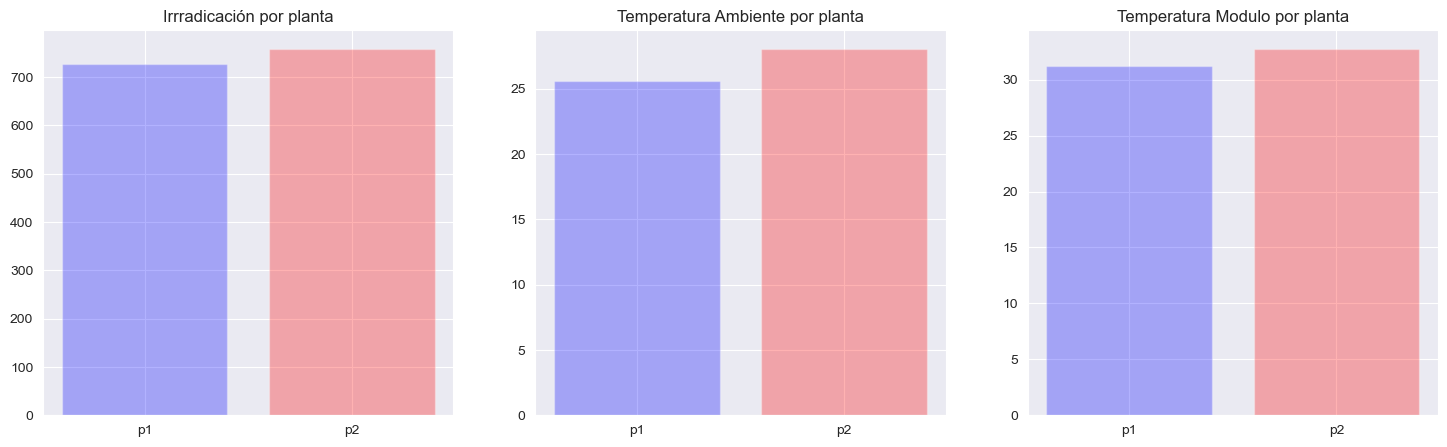

In [8]:
f, ax = plt.subplots(nrows= 1, ncols= 3, figsize=(18,5))

ax[0].bar(temp.index, temp.irradiacion, color= {'red','blue'}, alpha= 0.3)
ax[1].bar(temp.index, temp.t_ambiente, color= {'red','blue'}, alpha= 0.3)
ax[2].bar(temp.index, temp.t_modulo, color= {'red','blue'}, alpha= 0.3)

ax[0].set_title('Irrradicación por planta')
ax[1].set_title('Temperatura Ambiente por planta')
ax[2].set_title('Temperatura Modulo por planta')
;

In [9]:
temp = recepcion.loc[:,['planta','irradiacion','t_ambiente','t_modulo']]
temp.corr()

irradiacion      t_ambiente        t_modulo
irradiacion            1.00            0.65            0.95
t_ambiente             0.65            1.00            0.82
t_modulo               0.95            0.82            1.00

<AxesSubplot:>

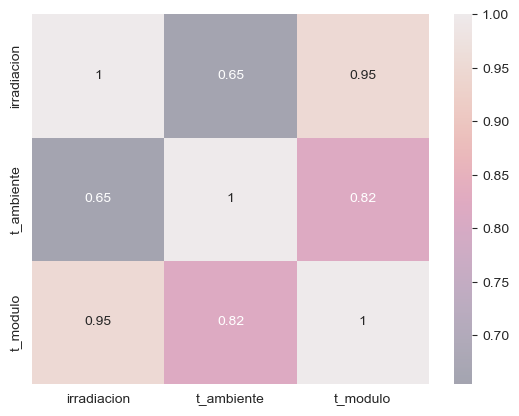

In [10]:
sns.heatmap(temp.corr(),annot=True, alpha=0.3)

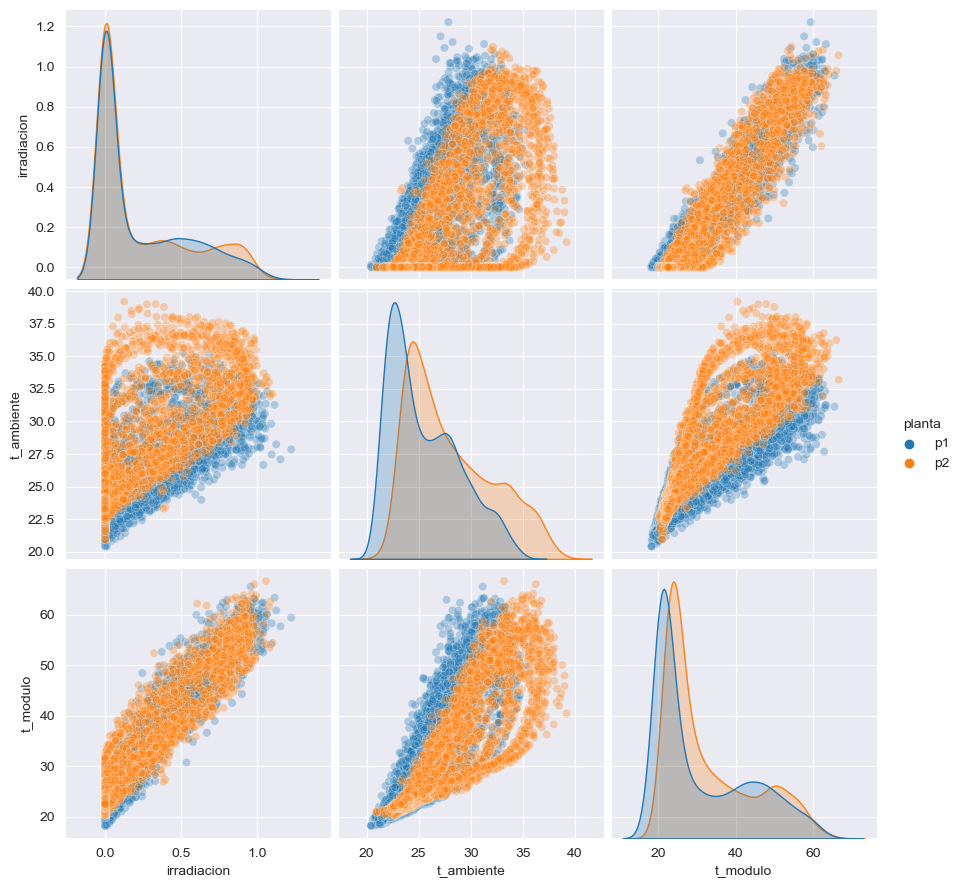

In [11]:
sns.pairplot(temp, hue='planta', plot_kws={'alpha':0.3} , height=3)

In [12]:
recepcion

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:45:00     p1    5   15     0      45  HmiyD2TTLFNqkNe   
2020-05-15 01:00:00     p1    5   15     1       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 22:45:00     p2    6   17    22      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:00:00     p2    6   17    23       0  iq8k7ZNt4Mwm3w0   
2020-06-17 23:15:00     p2    6   17    23      15  iq8k7ZNt4Mwm3w0   
2020-06-17 23:30:00     p2    6   17    23      30  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  
fecha                                                                
2020-05-15 00:00:00            0.00           25.18           22.86  
2020-05-15 00:15:00            0.00           25.08           22.76  
2020-05-15 00:30:00            0.00           24.94           22.59  
2020-05-15 00:45:00            0.00           24.85           22.36  
2020-05-15 01:00:00            0.00           24.62           22.17  
...                             ...             ...             ...  
2020-06-17 22:45:00            0.00           23.51           22.86  
2020-06-17 23:00:00            0.00           23.48           22.74  
2020-06-17 23:15:00            0.00           23.35           22.49  
2020-06-17 23:30:00            0.00           23.29           22.37  
2020-06-17 23:45:00            0.00           23.20           22.54  

[6413 rows x 9 columns]

In [13]:
temp = pd.crosstab(index=recepcion.hora, columns=recepcion.planta, values = recepcion.irradiacion, aggfunc= 'mean')
temp

planta              p1              p2
hora                                  
0                 0.00            0.00
1                 0.00            0.00
2                 0.00            0.00
3                 0.00            0.00
4                 0.00            0.00
5                 0.00            0.00
6                 0.04            0.04
7                 0.19            0.19
8                 0.37            0.39
9                 0.53            0.57
10                0.64            0.69
11                0.73            0.76
12                0.74            0.79
13                0.69            0.69
14                0.58            0.60
15                0.46            0.44
16                0.29            0.28
17                0.13            0.12
18                0.02            0.02
19                0.00            0.00
20                0.00            0.00
21                0.00            0.00
22                0.00            0.00
23                0.00            0.00

<AxesSubplot:xlabel='hora'>

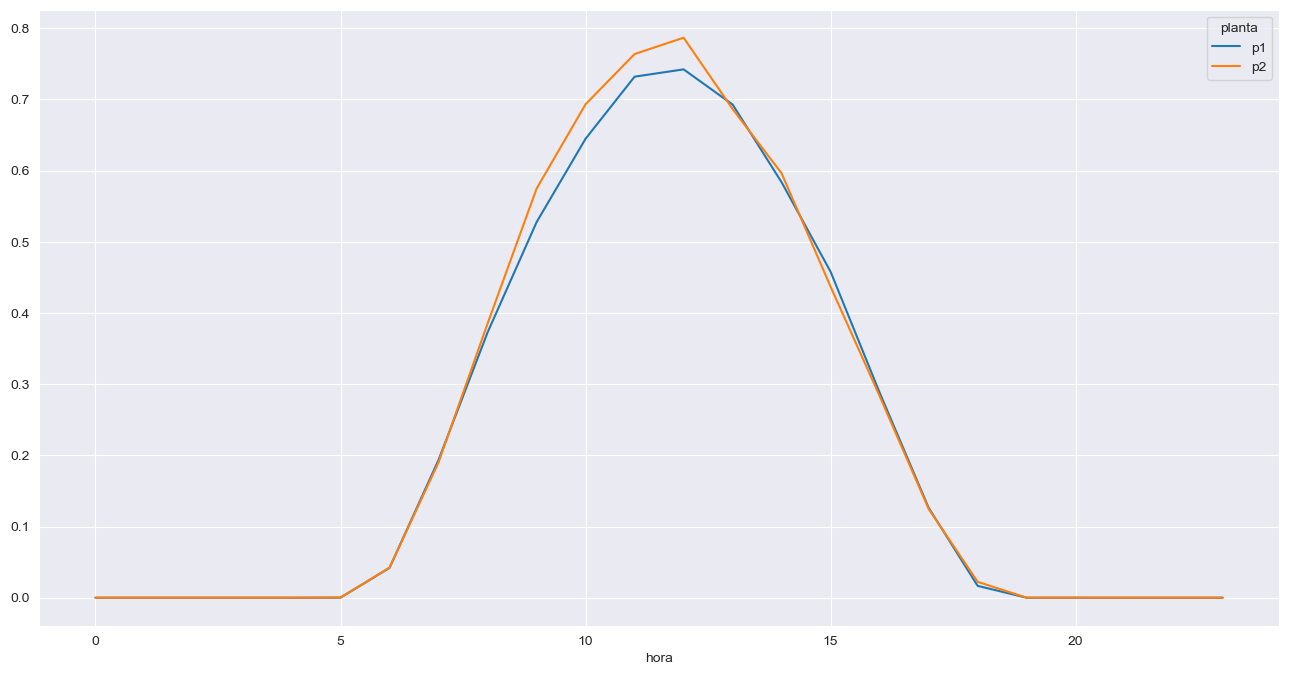

In [14]:
temp.plot(figsize = (16,8))

<AxesSubplot:xlabel='planta', ylabel='hora'>

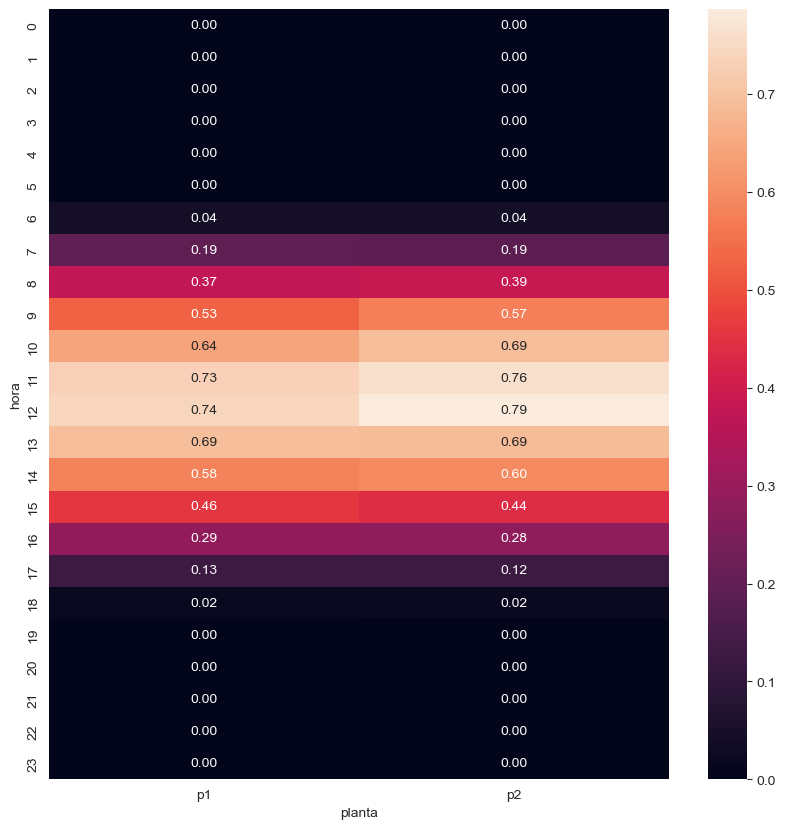

In [15]:
plt.figure(figsize= (10,10))
sns.heatmap(temp, annot= True, fmt = '.2f')

<AxesSubplot:xlabel='planta', ylabel='hora'>

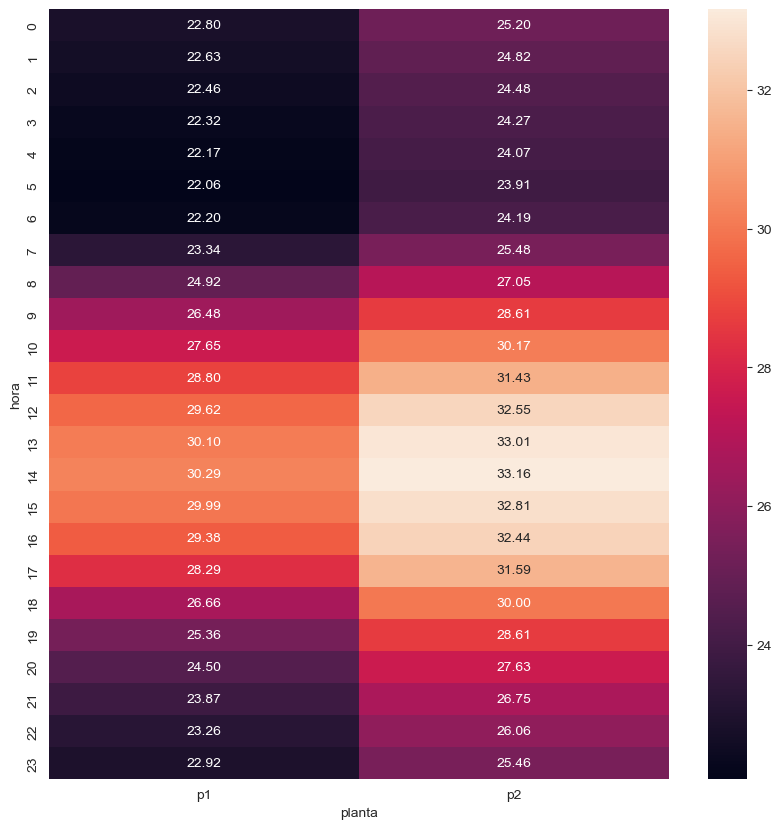

In [16]:
temp = pd.crosstab(recepcion.hora, recepcion.planta, values= recepcion.t_ambiente, aggfunc= 'mean')
plt.figure(figsize= (10,10))
sns.heatmap(temp, annot= True, fmt = '.2f')

<AxesSubplot:xlabel='hora'>

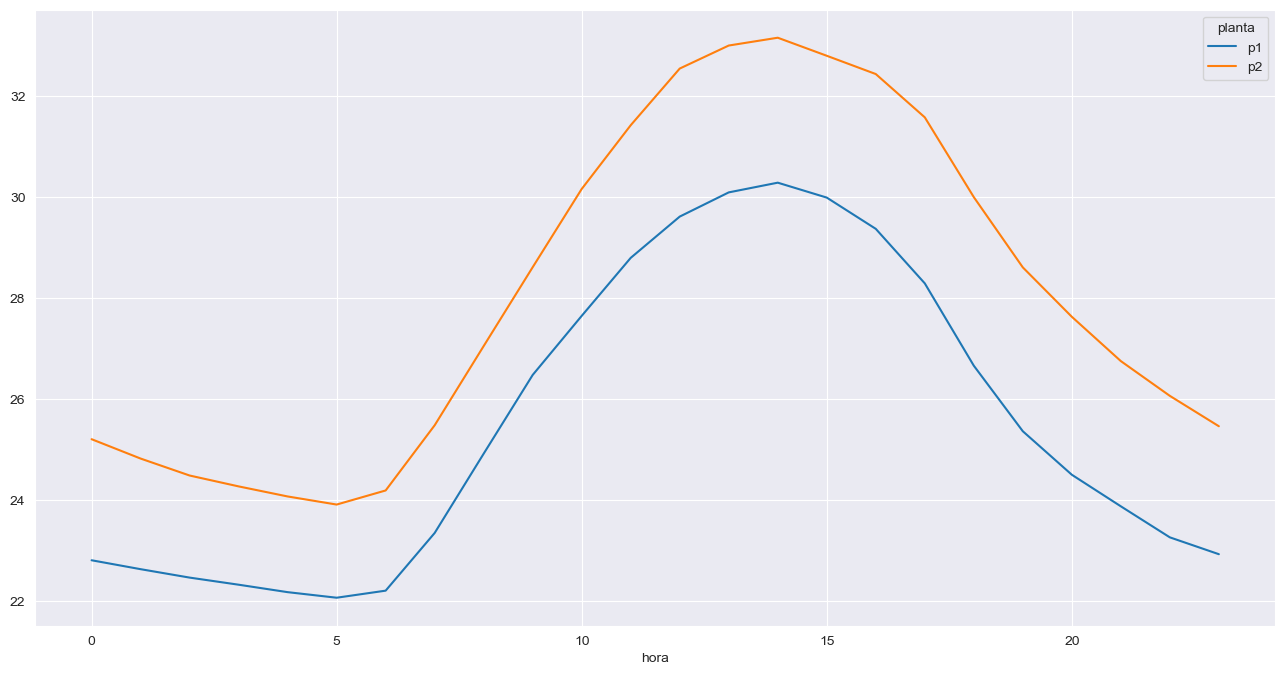

In [17]:
temp.plot(figsize = (16,8))

<AxesSubplot:xlabel='irradiacion', ylabel='kw_ac'>

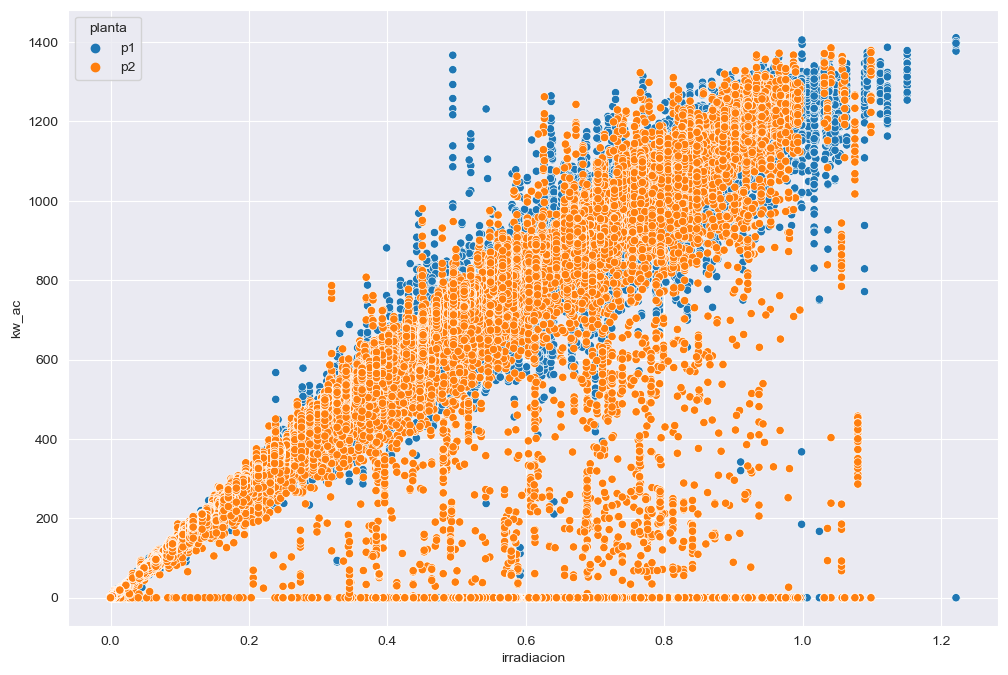

In [18]:
plt.figure(figsize= (12,8))
sns.scatterplot(data= df, x= df.irradiacion, y= df.kw_ac, hue= 'planta')

<AxesSubplot:xlabel='irradiacion', ylabel='kw_dc'>

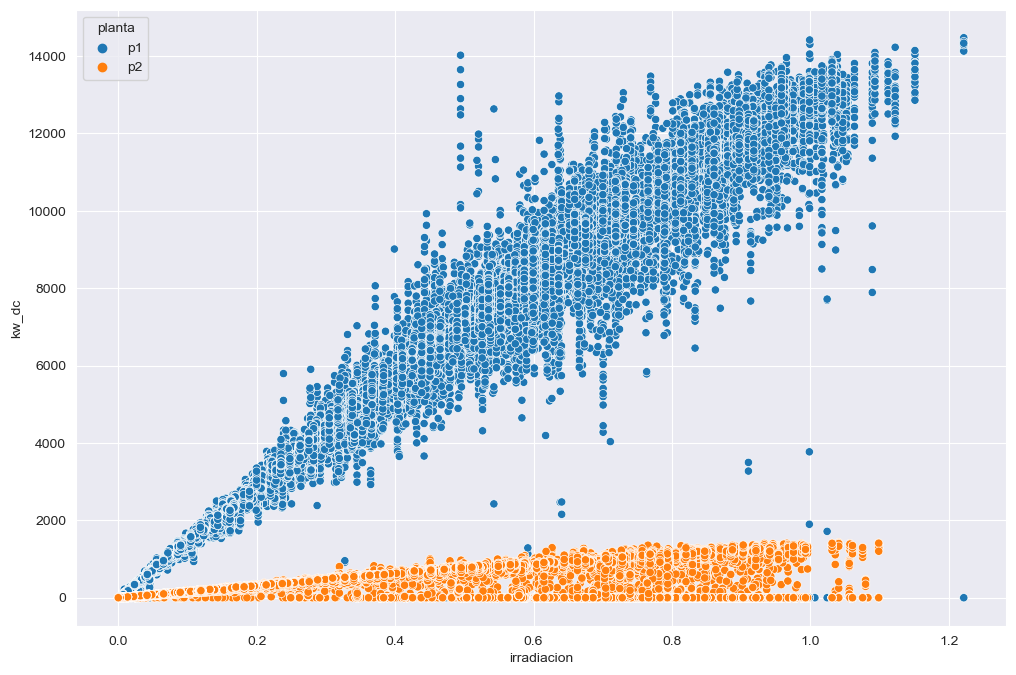

In [19]:
plt.figure(figsize= (12,8))
sns.scatterplot(data= df, x= df.irradiacion, y= df.kw_dc, hue= 'planta')

<AxesSubplot:xlabel='irradiacion', ylabel='kw_dia'>

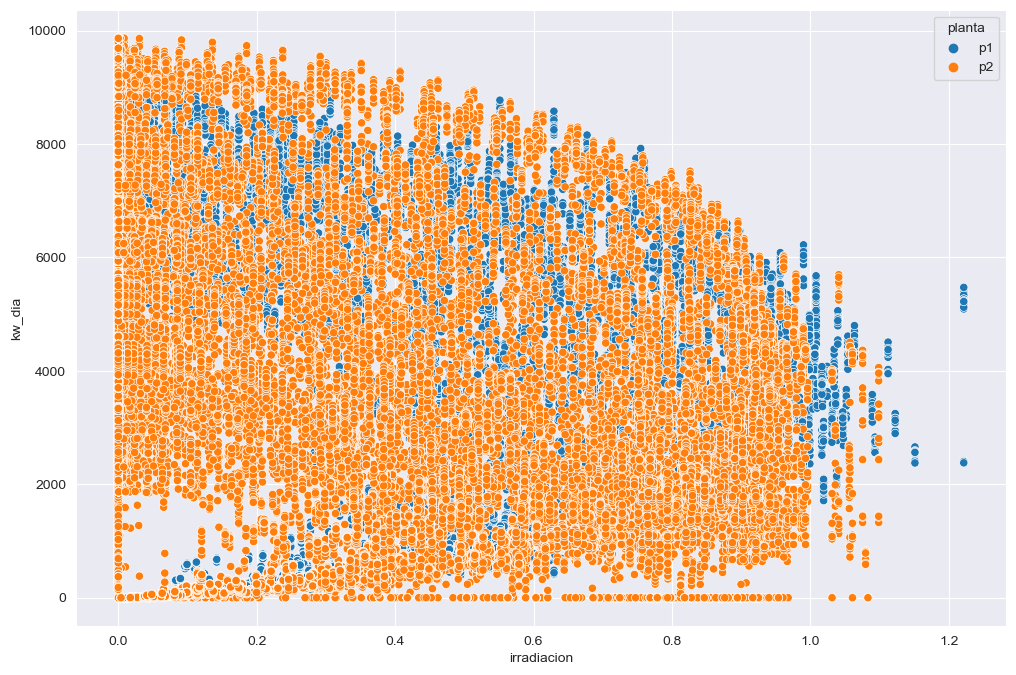

In [20]:
plt.figure(figsize= (12,8))
sns.scatterplot(data= df, x= df.irradiacion, y= df.kw_dia, hue= 'planta')

<AxesSubplot:xlabel='hora'>

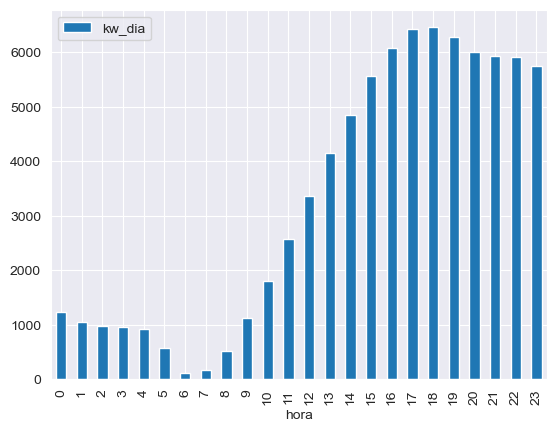

In [21]:
df.groupby('hora')[['kw_dia']].mean().plot.bar()

In [22]:
df_dia

planta      inverter_id  irradiacion_min  irradiacion_mean  \
fecha                                                                   
2020-05-15     p1  1BY6WEcLGh8j5v7             0.00              0.20   
2020-05-16     p1  1BY6WEcLGh8j5v7             0.00              0.21   
2020-05-17     p1  1BY6WEcLGh8j5v7             0.00              0.24   
2020-05-18     p1  1BY6WEcLGh8j5v7             0.00              0.16   
2020-05-19     p1  1BY6WEcLGh8j5v7             0.00              0.19   
...           ...              ...              ...               ...   
2020-06-13     p2  xoJJ8DcxJEcupym             0.00              0.22   
2020-06-14     p2  xoJJ8DcxJEcupym             0.00              0.23   
2020-06-15     p2  xoJJ8DcxJEcupym             0.00              0.19   
2020-06-16     p2  xoJJ8DcxJEcupym             0.00              0.17   
2020-06-17     p2  xoJJ8DcxJEcupym             0.00              0.12   

            irradiacion_max  t_ambiente_min  t_ambiente_mean  t_ambiente_max  \
fecha                                                                          
2020-05-15             0.89           22.04            27.43           34.43   
2020-05-16             0.81           21.50            26.78           32.52   
2020-05-17             1.00           21.21            26.69           35.25   
2020-05-18             0.97           20.96            23.85           28.37   
2020-05-19             0.84           22.39            25.34           30.37   
...                     ...             ...              ...             ...   
2020-06-13             0.93           22.20            26.12           31.91   
2020-06-14             0.92           23.65            27.02           32.96   
2020-06-15             0.83           24.00            26.56           31.61   
2020-06-16             0.77           23.63            26.37           30.83   
2020-06-17             0.58           22.55            24.85           29.04   

              t_modulo_min   t_modulo_mean  ...       kw_dc_sum  \
fecha                                       ...                   
2020-05-15           20.29           32.58  ...       235340.70   
2020-05-16           19.59           31.86  ...       256629.88   
2020-05-17           20.38           32.74  ...       288039.82   
2020-05-18           19.48           27.81  ...       204030.30   
2020-05-19           20.06           29.73  ...       232277.27   
...                    ...             ...  ...             ...   
2020-06-13           20.88           30.39  ...        27443.74   
2020-06-14           22.12           31.59  ...        30768.78   
2020-06-15           23.00           30.00  ...        25597.24   
2020-06-16           22.56           29.59  ...        22335.69   
2020-06-17           21.91           26.67  ...        17640.42   

                 kw_ac_min      kw_ac_mean       kw_ac_max       kw_ac_sum  \
fecha                                                                        
2020-05-15            0.00          247.81         1039.35        23046.55   
2020-05-16            0.00          285.51         1095.29        25124.49   
2020-05-17            0.00          293.47         1114.81        28172.85   
2020-05-18            0.00          208.03         1193.63        19970.51   
2020-05-19            0.00          244.53         1059.80        22741.18   
...                    ...             ...             ...             ...   
2020-06-13            0.00          279.59         1239.95        26840.58   
2020-06-14            0.00          313.43         1328.21        30088.97   
2020-06-15            0.00          260.93         1256.67        25049.49   
2020-06-16            0.00          227.82         1098.21        21870.63   
2020-06-17            0.00          179.98          810.77        17278.51   

            eficiencia_min  eficiencia_mean  eficiencia_max      kw_dia_max  \
fecha                                                 

<AxesSubplot:xlabel='fecha', ylabel='kw_dc_sum'>

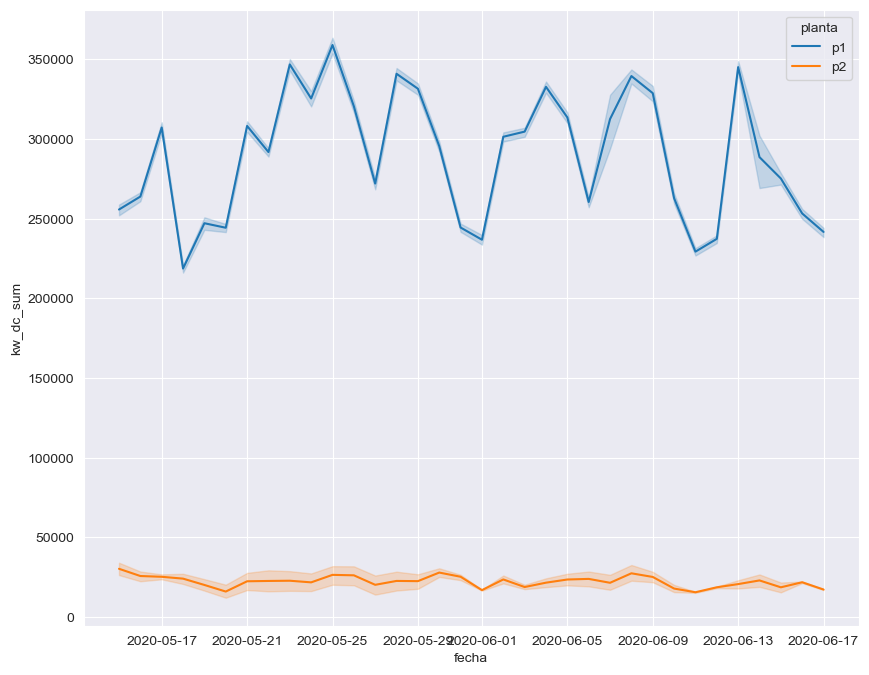

In [23]:
plt.figure(figsize=(10,8))
sns.lineplot(data = df_dia, x= df_dia.index, y= 'kw_dc_sum', hue= 'planta')

In [24]:
df['date'] = df.index.date

In [27]:
dc_constante_p1 = df[df.planta == 'p1'].groupby(['planta','date','hora']).kw_dc.sum()
dc_constante_p1

planta  date        hora
p1      2020-05-15  0                 0.00
                    1                 0.00
                    2                 0.00
                    3                 0.00
                    4                 0.00
                                 ...      
        2020-06-17  19                0.00
                    20                0.00
                    21                0.00
                    22                0.00
                    23                0.00
Name: kw_dc, Length: 796, dtype: float64

In [28]:
dc_constante_p1.unstack(level=1)

date             2020-05-15      2020-05-16      2020-05-17      2020-05-18  \
planta hora                                                                   
p1     0               0.00             NaN            0.00            0.00   
       1               0.00             NaN            0.00            0.00   
       2               0.00            0.00            0.00            0.00   
       3               0.00            0.00            0.00            0.00   
       4               0.00            0.00            0.00            0.00   
       5               0.00            0.00            0.00            0.00   
       6           50981.99        48975.18        32080.77        51656.43   
       7          173925.31       207292.57       242173.46       210673.27   
       8          371406.99       470620.55       512873.50       140741.09   
       9          502317.20       559489.09       723267.27       143262.84   
       10         583969.55       708576.71       907350.29       281863.16   
       11         677146.62       697296.63      1025608.21       548456.16   
       12         772694.83       837437.95       826249.52       730226.89   
       13         626126.96       766125.39       683349.84       925790.02   
       14         785869.46       650535.38       619761.54       604474.46   
       15         546353.00       484587.63       628015.77       666662.71   
       16         390470.50       242881.41       418062.17       368908.86   
       17         137272.51       120922.43       130939.25       126809.80   
       18           8704.22        11396.61         9862.96        13022.84   
       19              0.00            0.00            0.00            0.00   
       20              0.00            0.00            0.00            0.00   
       21              0.00            0.00            0.00            0.00   
       22              0.00            0.00            0.00            0.00   
       23              0.00            0.00            0.00            0.00   

date             2020-05-19      2020-05-20      2020-05-21      2020-05-22  \
planta hora                                                                   
p1     0               0.00            0.00             NaN            0.00   
       1               0.00            0.00             NaN            0.00   
       2               0.00            0.00             NaN            0.00   
       3               0.00            0.00             NaN            0.00   
       4               0.00            0.00             NaN            0.00   
       5               0.00            0.00             NaN            0.00   
       6           21895.75        48567.57             NaN        63238.34   
       7          242869.04       260964.30        76297.85       308776.84   
       8          280784.16       547730.36       527519.32       356639.80   
       9          595876.57       760212.75       808786.05       496513.19   
       10         651805.18       949093.43       734222.32       669893.89   
       11         475898.79      1064016.89      1045382.98       902382.14   
       12         468945.33      1120950.52       875804.46       961908.82   
       13         774521.57       522015.50       977007.34       920133.14   
       14         844728.46             NaN       739455.91       871788.63   
       15         558301.00             NaN       614382.46       547448.75   
       16         409339.77             NaN       310917.68       222682.29   
       17         112971.23        74780.93        62690.61        90621.88   
       18             18.00        27253.52         8601.16         8656.80   
       19              0.00            0.00            0.00            0.00   
       20              0.00            0.00            0.00            0.00   
       21              0.00            0.00            0.00            0.00   
       22              0.00            0.00      

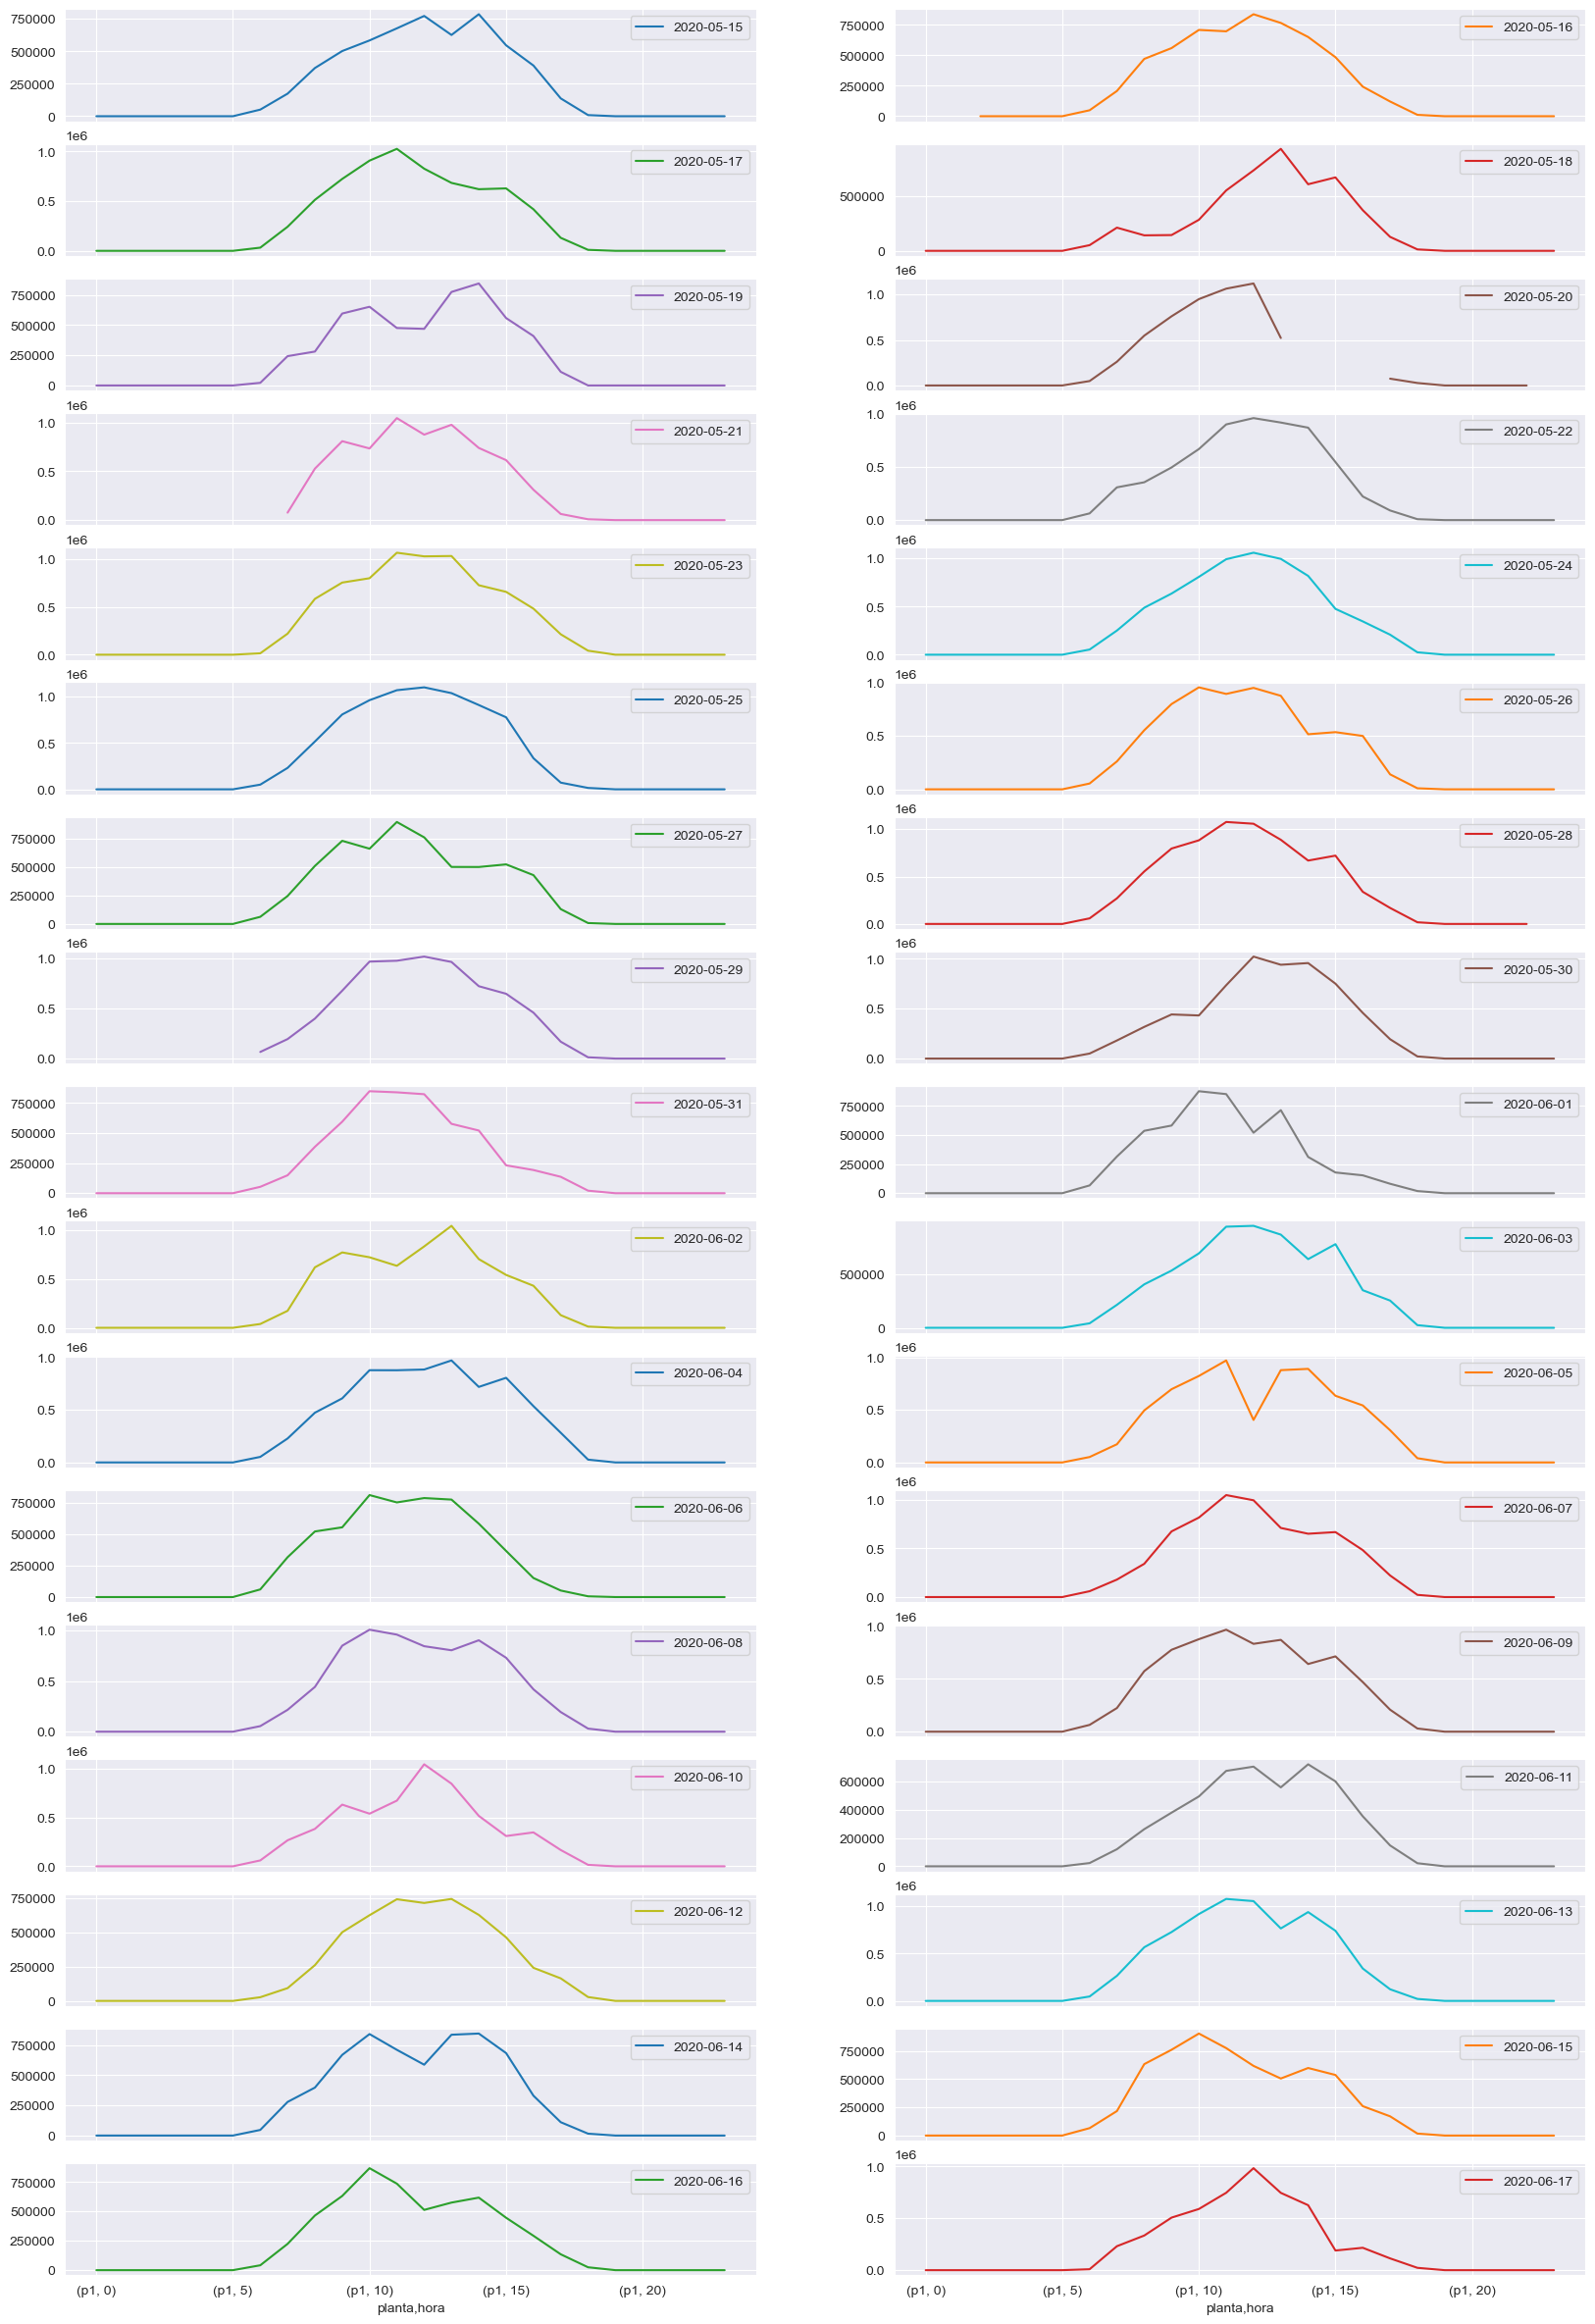

In [29]:

dc_constante_p1.unstack(level=1).plot(subplots = True, layout= (17,2), sharex = True, figsize=(20,30));

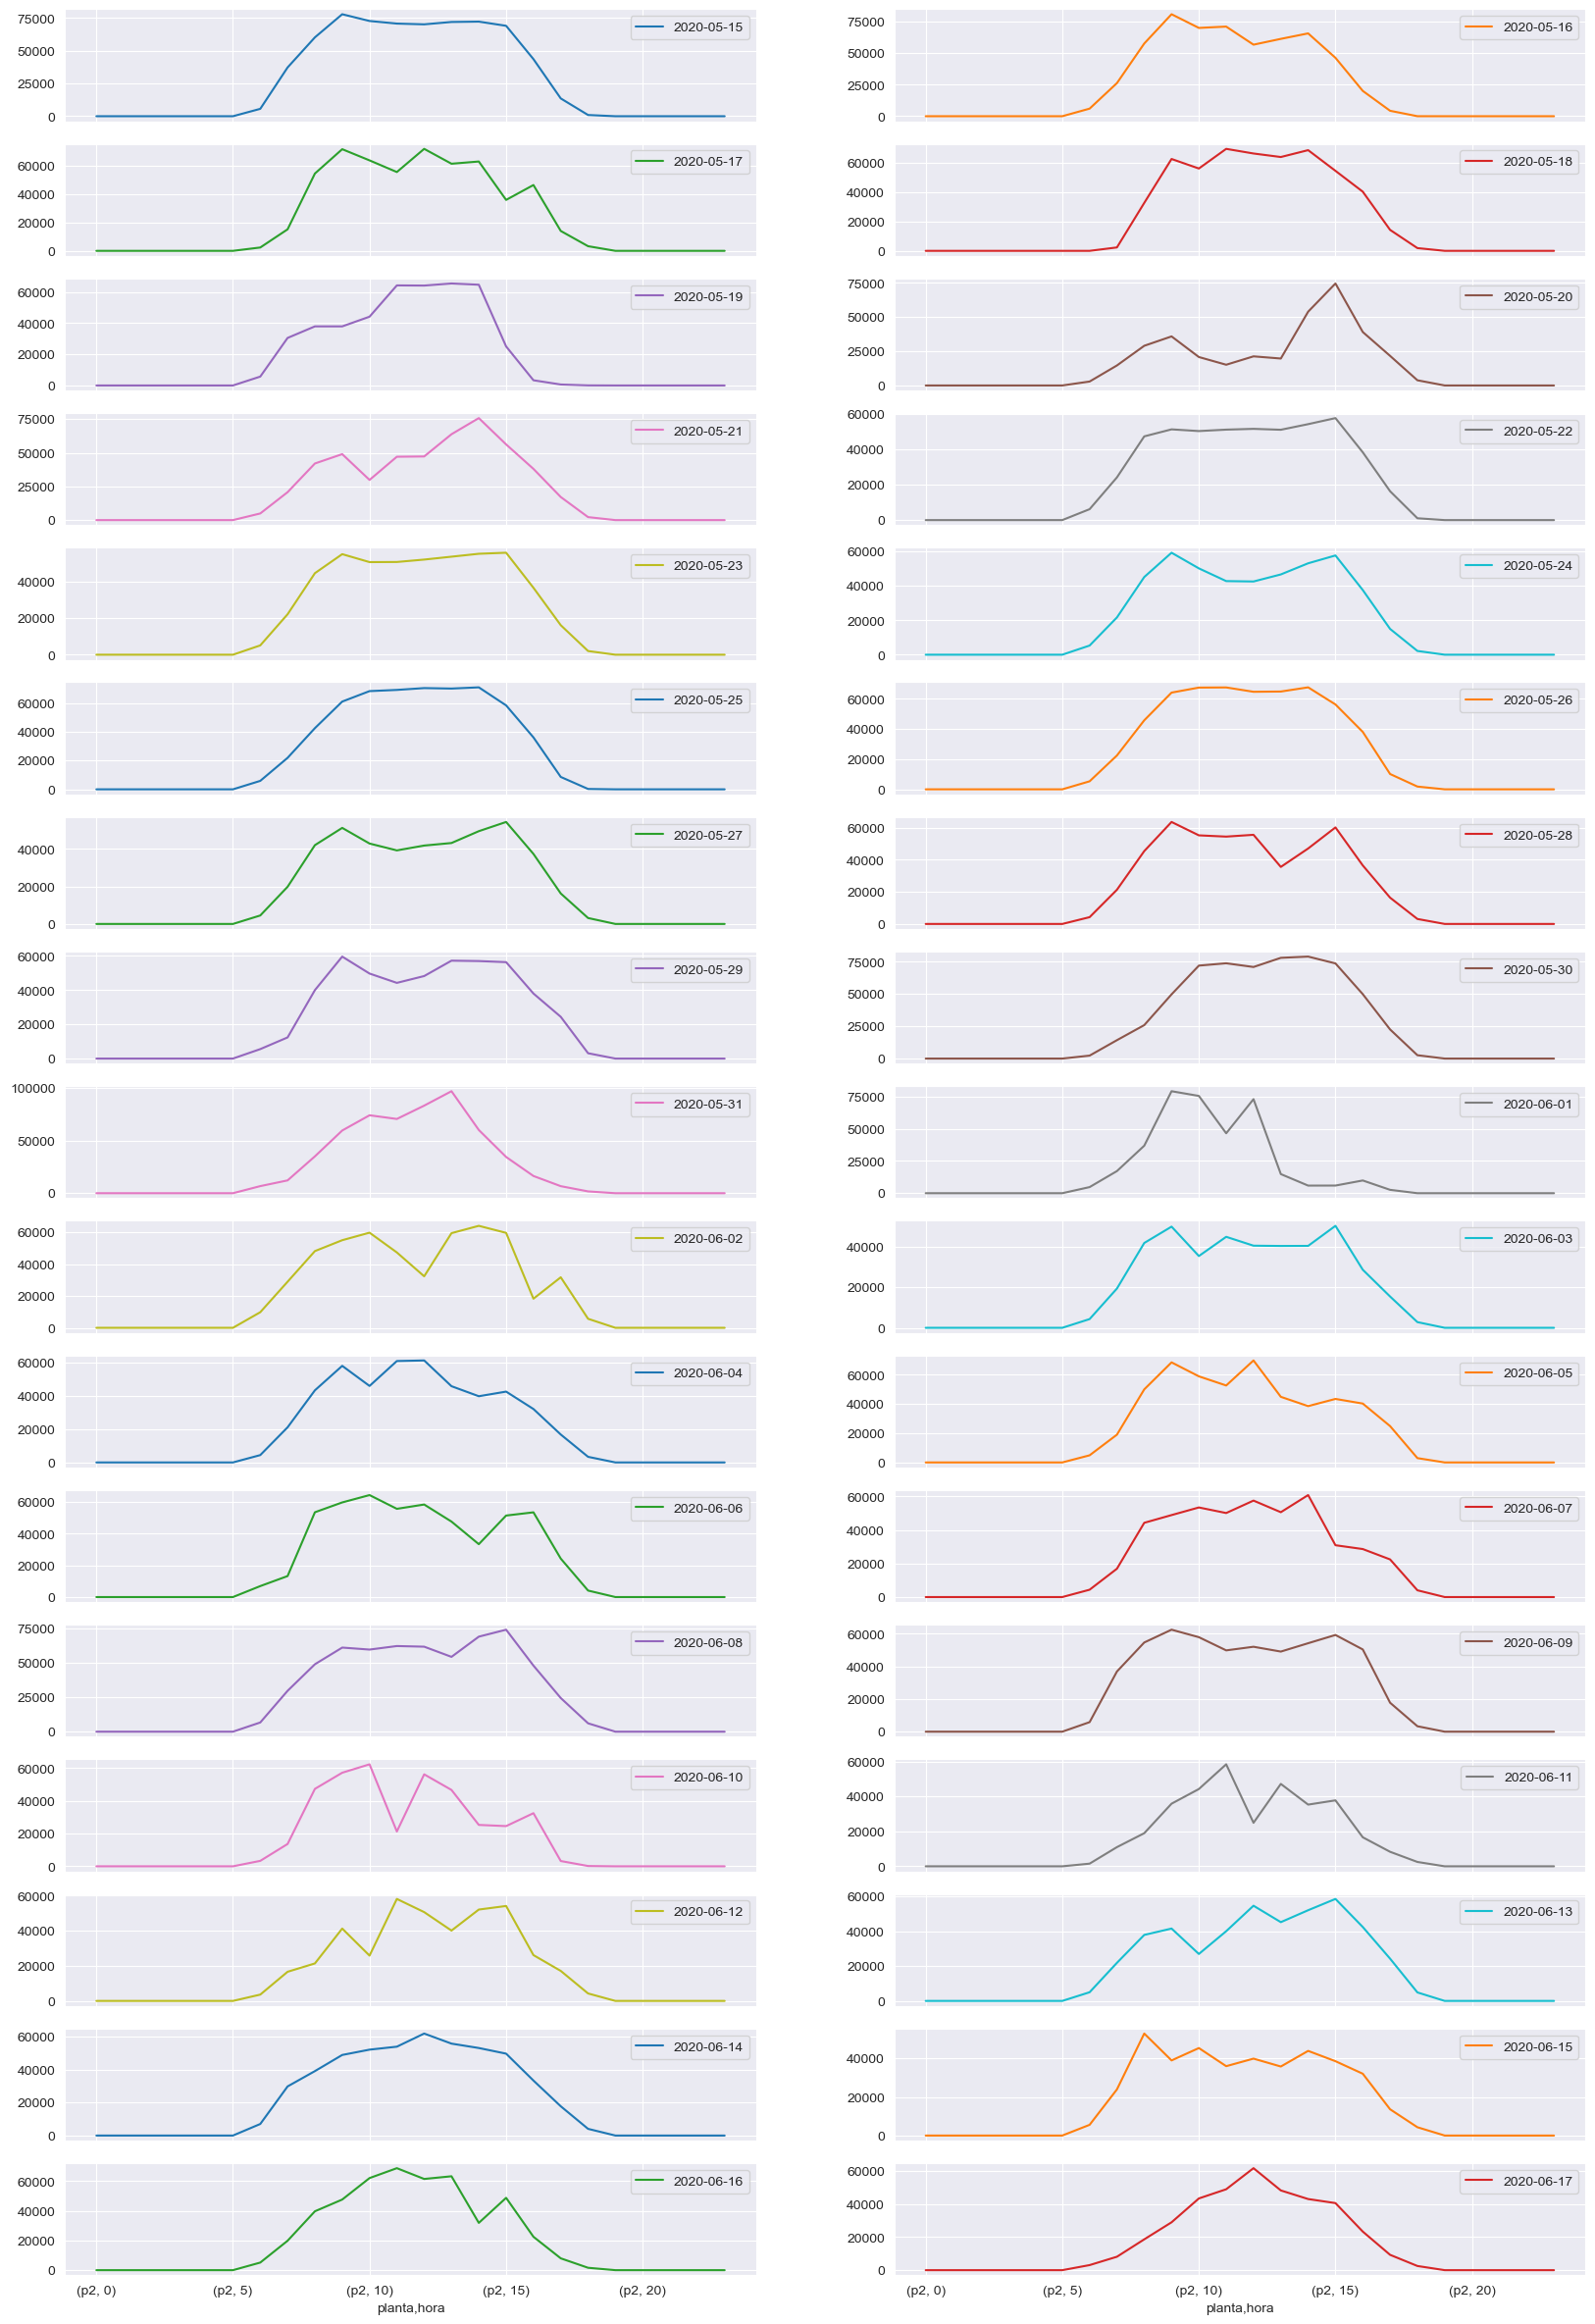

In [30]:
dc_constante_p1 = df[df.planta == 'p2'].groupby(['planta','date','hora']).kw_dc.sum()
dc_constante_p1.unstack(level=1).plot(subplots = True, layout= (17,2), sharex = True, figsize=(20,30));

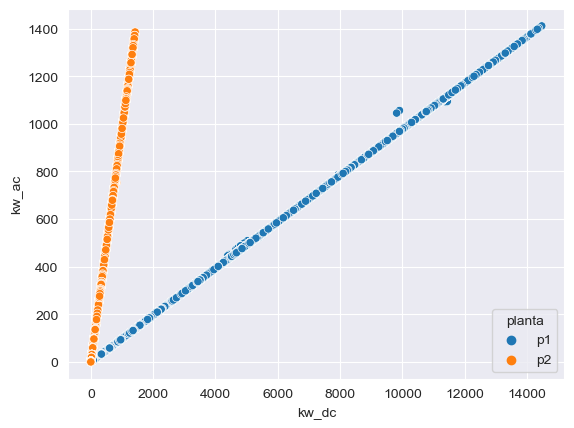

In [31]:
sns.scatterplot(data= df, x= df.kw_dc, y= df.kw_ac, hue= 'planta');

In [32]:
df

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 00:00:00  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00  McdE0feGgRqW7Ca            0.00            0.00   
...                              ...             ...             ...   
2020-06-17 23:45:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00  xoJJ8DcxJEcupym            0.00            0.00   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 00:00:00            0.00            0.00      6259559.00   
2020-05-15 00:00:00            0.00            0.00      6183645.00   
2020-05-15 00:00:00            0.00            0.00      6987759.00   
2020-05-15 00:00:00            0.00            0.00      7602960.00   
2020-05-15 00:00:00            0.00            0.00      7158964.00   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00         4157.00       520758.00   
2020-06-17 23:45:00            0.00         3931.00    121131356.00   
2020-06-17 23:45:00            0.00         4322.00      2427691.00   
2020-06-17 23:45:00            0.00         4218.00    106896394.00   
2020-06-17 23:45:00            0.00         4316.00    209335741.00   

                           date  
fecha                            
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
...                         ...  
2020-06-17 23:45:00  2020-06-17  
2020-

In [33]:
temp = df.groupby(['planta','hora'],as_index= False).eficiencia.mean()
temp

planta  hora      eficiencia
0      p1     0            0.00
1      p1     1            0.00
2      p1     2            0.00
3      p1     3            0.00
4      p1     4            0.00
5      p1     5            0.00
6      p1     6            9.20
7      p1     7            9.80
8      p1     8            9.81
9      p1     9            9.78
10     p1    10            9.77
11     p1    11            9.75
12     p1    12            9.71
13     p1    13            9.68
14     p1    14            9.76
15     p1    15            9.79
16     p1    16            9.81
17     p1    17            9.76
18     p1    18            6.53
19     p1    19            0.00
20     p1    20            0.00
21     p1    21            0.00
22     p1    22            0.00
23     p1    23            0.00
24     p2     0            0.00
25     p2     1            0.00
26     p2     2            0.00
27     p2     3            0.00
28     p2     4            0.00
29     p2     5            0.58
30     p2     6           92.93
31     p2     7           97.39
32     p2     8           97.42
33     p2     9           91.70
34     p2    10           76.20
35     p2    11           68.35
36     p2    12           68.16
37     p2    13           73.04
38     p2    14           83.43
39     p2    15           95.69
40     p2    16           95.85
41     p2    17           95.56
42     p2    18           73.52
43     p2    19            0.00
44     p2    20            0.00
45     p2    21            0.00
46     p2    22            0.00
47     p2    23            0.00

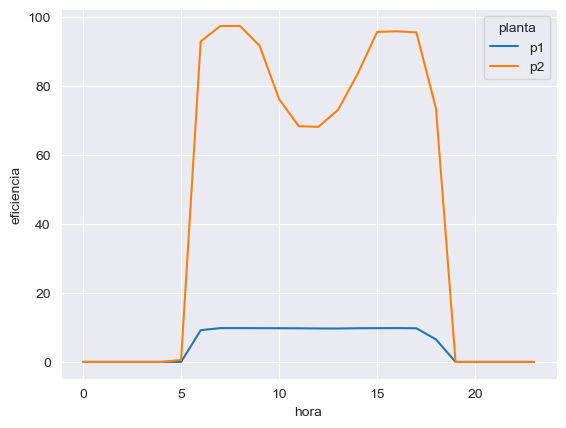

In [34]:
sns.lineplot(data= temp, x= temp.hora, y= temp.eficiencia, hue= 'planta');

In [35]:
temp = df[['planta','hora','kw_dc','kw_ac']].melt(id_vars=['planta','hora'])
temp

planta  hora variable           value
0          p1     0    kw_dc            0.00
1          p1     0    kw_dc            0.00
2          p1     0    kw_dc            0.00
3          p1     0    kw_dc            0.00
4          p1     0    kw_dc            0.00
...       ...   ...      ...             ...
272939     p2    23    kw_ac            0.00
272940     p2    23    kw_ac            0.00
272941     p2    23    kw_ac            0.00
272942     p2    23    kw_ac            0.00
272943     p2    23    kw_ac            0.00

[272944 rows x 4 columns]

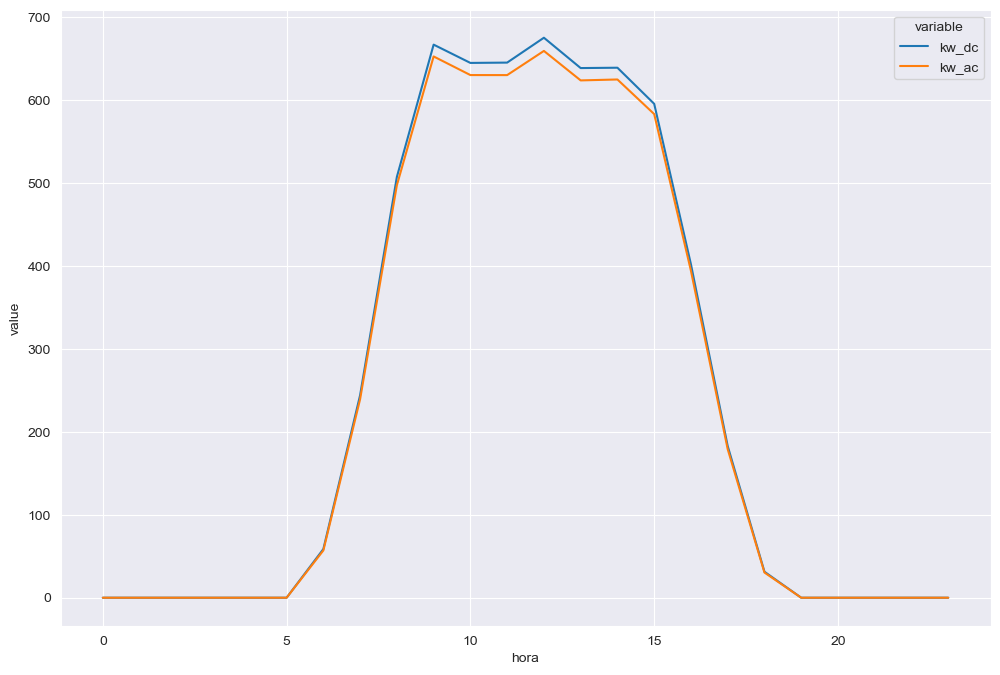

In [36]:
plt.figure(figsize=(12,8))
sns.lineplot(data= temp[temp.planta =='p2'], x='hora', y= 'value', hue='variable', errorbar= None);

In [37]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.planta == 'p2']
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  4UPUqMRk7TRMgml          581.05          569.41   
2020-05-15 08:00:00  81aHJ1q11NBPMrL          534.67          524.09   
2020-05-15 08:00:00  9kRcWv60rDACzjR          568.53          557.16   
2020-05-15 08:00:00  Et9kgGMDl729KT4          526.24          515.83   
2020-05-15 08:00:00  IQ2d7wF4YD8zU1Q          578.17          566.58   
...                              ...             ...             ...   
2020-06-17 15:00:00  q49J1IKaHRwDQnt          562.34          551.13   
2020-06-17 15:00:00  rrq4fwE8jgrTyWY          534.27          523.71   
2020-06-17 15:00:00  vOuJvMaM2sgwLmb          578.85          567.15   
2020-06-17 15:00:00  xMbIugepa2P7lBB          568.86          557.49   
2020-06-17 15:00:00  xoJJ8DcxJEcupym          578.49          566.90   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00           98.00          554.00      2429565.00   
2020-05-15 08:00:00           98.02          516.60   1215279252.60   
2020-05-15 08:00:00           98.00          551.80   2247720128.80   
2020-05-15 08:00:00           98.02          503.00      1704753.00   
2020-05-15 08:00:00           97.99          552.79     19942078.79   
...                             ...             ...             ...   
2020-06-17 15:00:00           98.01         3380.87       519981.87   
2020-06-17 15:00:00           98.02         3190.40    121130615.40   
2020-06-17 15:00:00           97.98         3534.07      2426903.07   
2020-06-17 15:00:00           98.00         3433.50    106895609.50   
2020-06-17 15:00:00           98.00         3534.67    209334959.67   

                           date  
fecha                            
2020-05-15 08:00:00  2020-05-15  
2020-05-15 08:00:00  2020-05-15  
2020-05-15 08:00:00  2020-05-15  
2020-05-15 08:00:00  2020-05-15  
2020-05-15 08:00:00  2020-05-15  
...                         ...  
2020-06-17 15:00:00  2020-06-17  
2020-

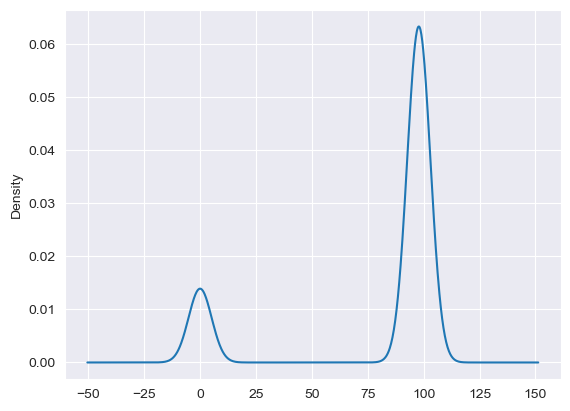

In [38]:
temp.eficiencia.plot.kde();

In [39]:
temp[temp.kw_dc == 0]

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 09:45:00     p2    5   15     9      45  iq8k7ZNt4Mwm3w0   
2020-05-15 10:00:00     p2    5   15    10       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   
2020-06-16 14:30:00     p2    6   16    14      30  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 09:45:00            0.80           31.38           45.72   
2020-05-15 10:00:00            0.83           31.89           46.13   
...                             ...             ...             ...   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   
2020-06-16 14:30:00            0.56           30.83           44.38   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 09:45:00  81aHJ1q11NBPMrL            0.00            0.00   
2020-05-15 09:45:00  Et9kgGMDl729KT4            0.00            0.00   
2020-05-15 09:45:00  Quc1TzYxW2pYoWX            0.00            0.00   
2020-05-15 09:45:00  xoJJ8DcxJEcupym            0.00            0.00   
2020-05-15 10:00:00  81aHJ1q11NBPMrL            0.00            0.00   
...                              ...             ...             ...   
2020-06-16 14:30:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-16 14:30:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-16 14:30:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-16 14:30:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-16 14:30:00  xoJJ8DcxJEcupym            0.00            0.00   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 09:45:00            0.00         1645.00   1215280381.00   
2020-05-15 09:45:00            0.00         1541.00      1705791.00   
2020-05-15 09:45:00            0.00         1324.00    329510409.00   
2020-05-15 09:45:00            0.00         1735.00    209145328.00   
2020-05-15 10:00:00            0.00         1645.00   1215280381.00   
...                             ...             ...             ...   
2020-06-16 14:30:00            0.00            0.00        34379.33   
2020-06-16 14:30:00            0.00            0.00      8075096.33   
2020-06-16 14:30:00            0.00            0.00       173022.79   
2020-06-16 14:30:00            0.00            0.00      7126074.93   
2020-06-16 14:30:00            0.00            0.00     13955359.33   

                           date  
fecha                            
2020-05-15 09:45:00  2020-05-15  
2020-05-15 09:45:00  2020-05-15  
2020-05-15 09:45:00  2020-05-15  
2020-05-15 09:45:00  2020-05-15  
2020-05-15 10:00:00  2020-05-15  
...                         ...  
2020-06-16 14:30:00  2020-06-16  
2020-

<AxesSubplot:ylabel='Density'>

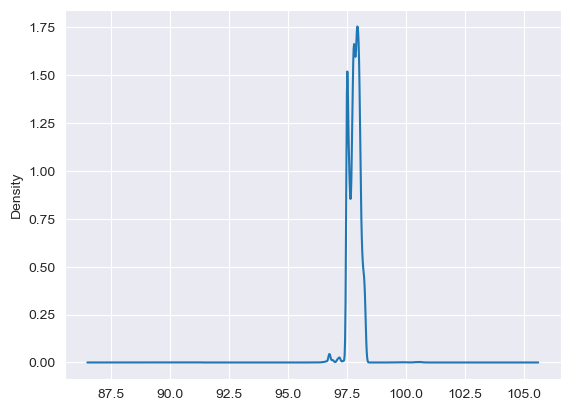

In [40]:
temp[temp.kw_dc > 0].eficiencia.plot.density()

In [41]:
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  4UPUqMRk7TRMgml          581.05          569.41   
2020-05-15 08:00:00  81aHJ1q11NBPMrL          534.67          524.09   
2020-05-15 08:00:00  9kRcWv60rDACzjR          568.53          557.16   
2020-05-15 08:00:00  Et9kgGMDl729KT4          526.24          515.83   
2020-05-15 08:00:00  IQ2d7wF4YD8zU1Q          578.17          566.58   
...                              ...             ...             ...   
2020-06-17 15:00:00  q49J1IKaHRwDQnt          562.34          551.13   
2020-06-17 15:00:00  rrq4fwE8jgrTyWY          534.27          523.71   
2020-06-17 15:00:00  vOuJvMaM2sgwLmb          578.85          567.15   
2020-06-17 15:00:00  xMbIugepa2P7lBB          568.86          557.49   
2020-06-17 15:00:00  xoJJ8DcxJEcupym          578.49          566.90   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00           98.00          554.00      2429565.00   
2020-05-15 08:00:00           98.02          516.60   1215279252.60   
2020-05-15 08:00:00           98.00          551.80   2247720128.80   
2020-05-15 08:00:00           98.02          503.00      1704753.00   
2020-05-15 08:00:00           97.99          552.79     19942078.79   
...                             ...             ...             ...   
2020-06-17 15:00:00           98.01         3380.87       519981.87   
2020-06-17 15:00:00           98.02         3190.40    121130615.40   
2020-06-17 15:00:00           97.98         3534.07      2426903.07   
2020-06-17 15:00:00           98.00         3433.50    106895609.50   
2020-06-17 15:00:00           98.00         3534.67    209334959.67   

                           date  kw_dc_cero  
fecha                                        
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15    

In [42]:
temp.groupby('kw_dc_cero')['irradiacion','t_ambiente','t_modulo'].mean()

C:\Users\ialca\AppData\Local\Temp\ipykernel_20636\3038624051.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp.groupby('kw_dc_cero')['irradiacion','t_ambiente','t_modulo'].mean()


irradiacion      t_ambiente        t_modulo
kw_dc_cero                                                
0                     0.59           30.48           44.32
1                     0.80           32.48           52.03

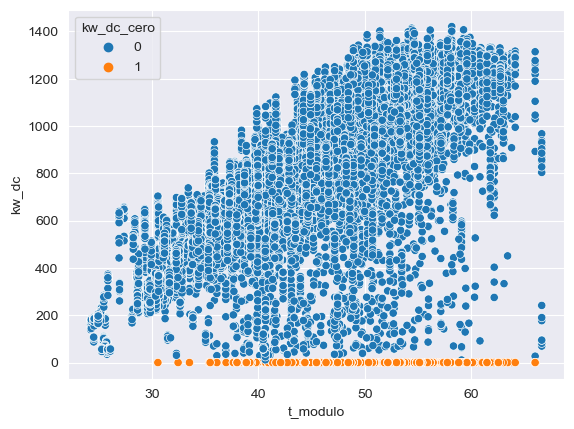

In [44]:
sns.scatterplot(data = temp, x= 't_modulo',y='kw_dc', hue= 'kw_dc_cero');

In [47]:
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  4UPUqMRk7TRMgml          581.05          569.41   
2020-05-15 08:00:00  81aHJ1q11NBPMrL          534.67          524.09   
2020-05-15 08:00:00  9kRcWv60rDACzjR          568.53          557.16   
2020-05-15 08:00:00  Et9kgGMDl729KT4          526.24          515.83   
2020-05-15 08:00:00  IQ2d7wF4YD8zU1Q          578.17          566.58   
...                              ...             ...             ...   
2020-06-17 15:00:00  q49J1IKaHRwDQnt          562.34          551.13   
2020-06-17 15:00:00  rrq4fwE8jgrTyWY          534.27          523.71   
2020-06-17 15:00:00  vOuJvMaM2sgwLmb          578.85          567.15   
2020-06-17 15:00:00  xMbIugepa2P7lBB          568.86          557.49   
2020-06-17 15:00:00  xoJJ8DcxJEcupym          578.49          566.90   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00           98.00          554.00      2429565.00   
2020-05-15 08:00:00           98.02          516.60   1215279252.60   
2020-05-15 08:00:00           98.00          551.80   2247720128.80   
2020-05-15 08:00:00           98.02          503.00      1704753.00   
2020-05-15 08:00:00           97.99          552.79     19942078.79   
...                             ...             ...             ...   
2020-06-17 15:00:00           98.01         3380.87       519981.87   
2020-06-17 15:00:00           98.02         3190.40    121130615.40   
2020-06-17 15:00:00           97.98         3534.07      2426903.07   
2020-06-17 15:00:00           98.00         3433.50    106895609.50   
2020-06-17 15:00:00           98.00         3534.67    209334959.67   

                           date  kw_dc_cero  
fecha                                        
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15    

<AxesSubplot:xlabel='inverter_id'>

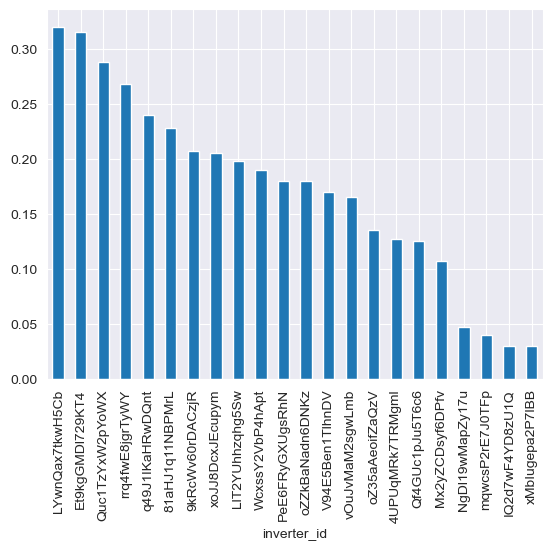

In [51]:
temp.groupby('inverter_id')['kw_dc_cero'].mean().sort_values(ascending=False).plot.bar()

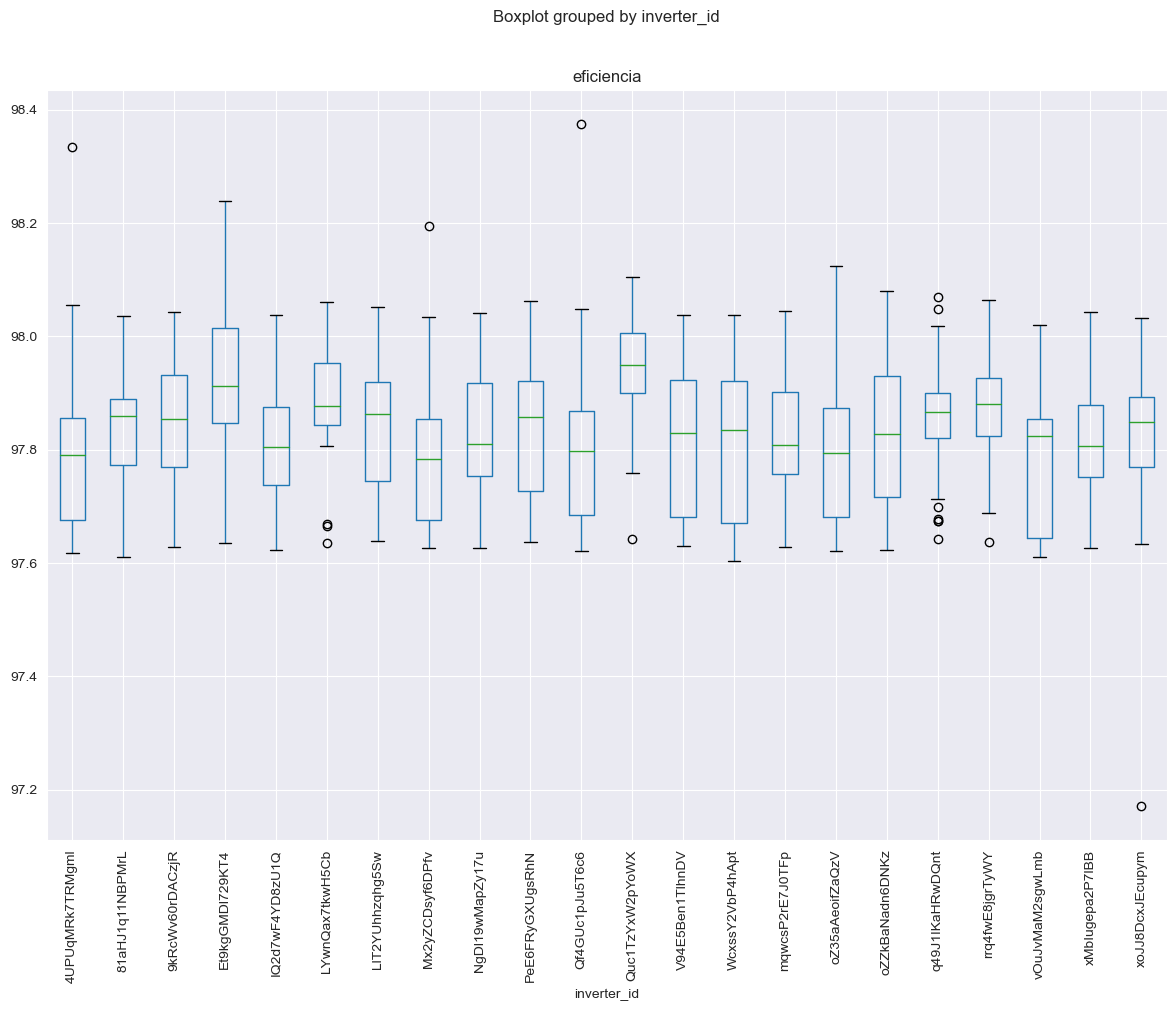

In [64]:
temp[temp.kw_dc > 0].groupby(['inverter_id','date'], as_index=False).eficiencia.mean().boxplot(column= 'eficiencia', by='inverter_id', figsize= (14,10))
plt.xticks(rotation=90);

In [ ]:
temp[temp.kw_dc > 0].groupby(['inverter_id','date']).eficiencia.mean().unstack(level=0).plot(subplots=True, sharex=True, figsize= (20,40));

In [74]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.planta == 'p1']
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  1BY6WEcLGh8j5v7         3246.00          318.67   
2020-05-15 08:00:00  1IF53ai7Xc0U56Y         2805.62          275.46   
2020-05-15 08:00:00  3PZuoBAID5Wc2HD         2736.12          268.62   
2020-05-15 08:00:00  7JYdWkrLSPkdwr4         2741.50          269.15   
2020-05-15 08:00:00  McdE0feGgRqW7Ca         3208.88          315.05   
...                              ...             ...             ...   
2020-06-17 15:00:00  uHbuxQJl8lW7ozc         4719.62          462.89   
2020-06-17 15:00:00  wCURE6d3bPkepu2         5077.75          497.80   
2020-06-17 15:00:00  z9Y9gH1T5YWrNuG         5113.00          501.29   
2020-06-17 15:00:00  zBIq5rxdHJRwDNY         4675.38          458.61   
2020-06-17 15:00:00  zVJPv84UY57bAof         4853.75          475.96   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00            9.82          263.57      6259822.57   
2020-05-15 08:00:00            9.82          292.50      6183937.50   
2020-05-15 08:00:00            9.82          287.75      6988046.75   
2020-05-15 08:00:00            9.82          281.00      7603241.00   
2020-05-15 08:00:00            9.82          291.00      7159255.00   
...                             ...             ...             ...   
2020-06-17 15:00:00            9.81         5423.50      7286458.50   
2020-06-17 15:00:00            9.80         5343.75      7028061.75   
2020-06-17 15:00:00            9.80         5282.88      7250667.88   
2020-06-17 15:00:00            9.81         5284.75      6582836.75   
2020-06-17 15:00:00            9.81         5368.75      7362730.75   

                           date  kw_dc_cero  
fecha                                        
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15    

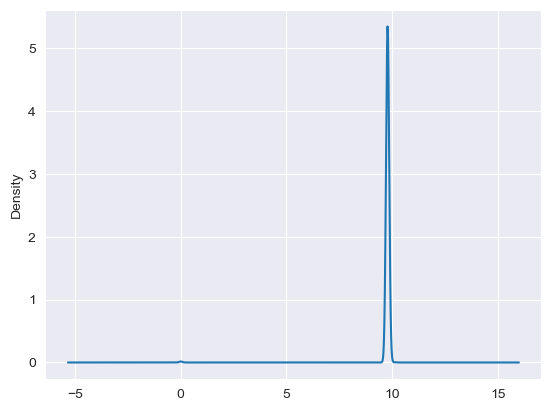

In [76]:
temp.eficiencia.plot.kde();

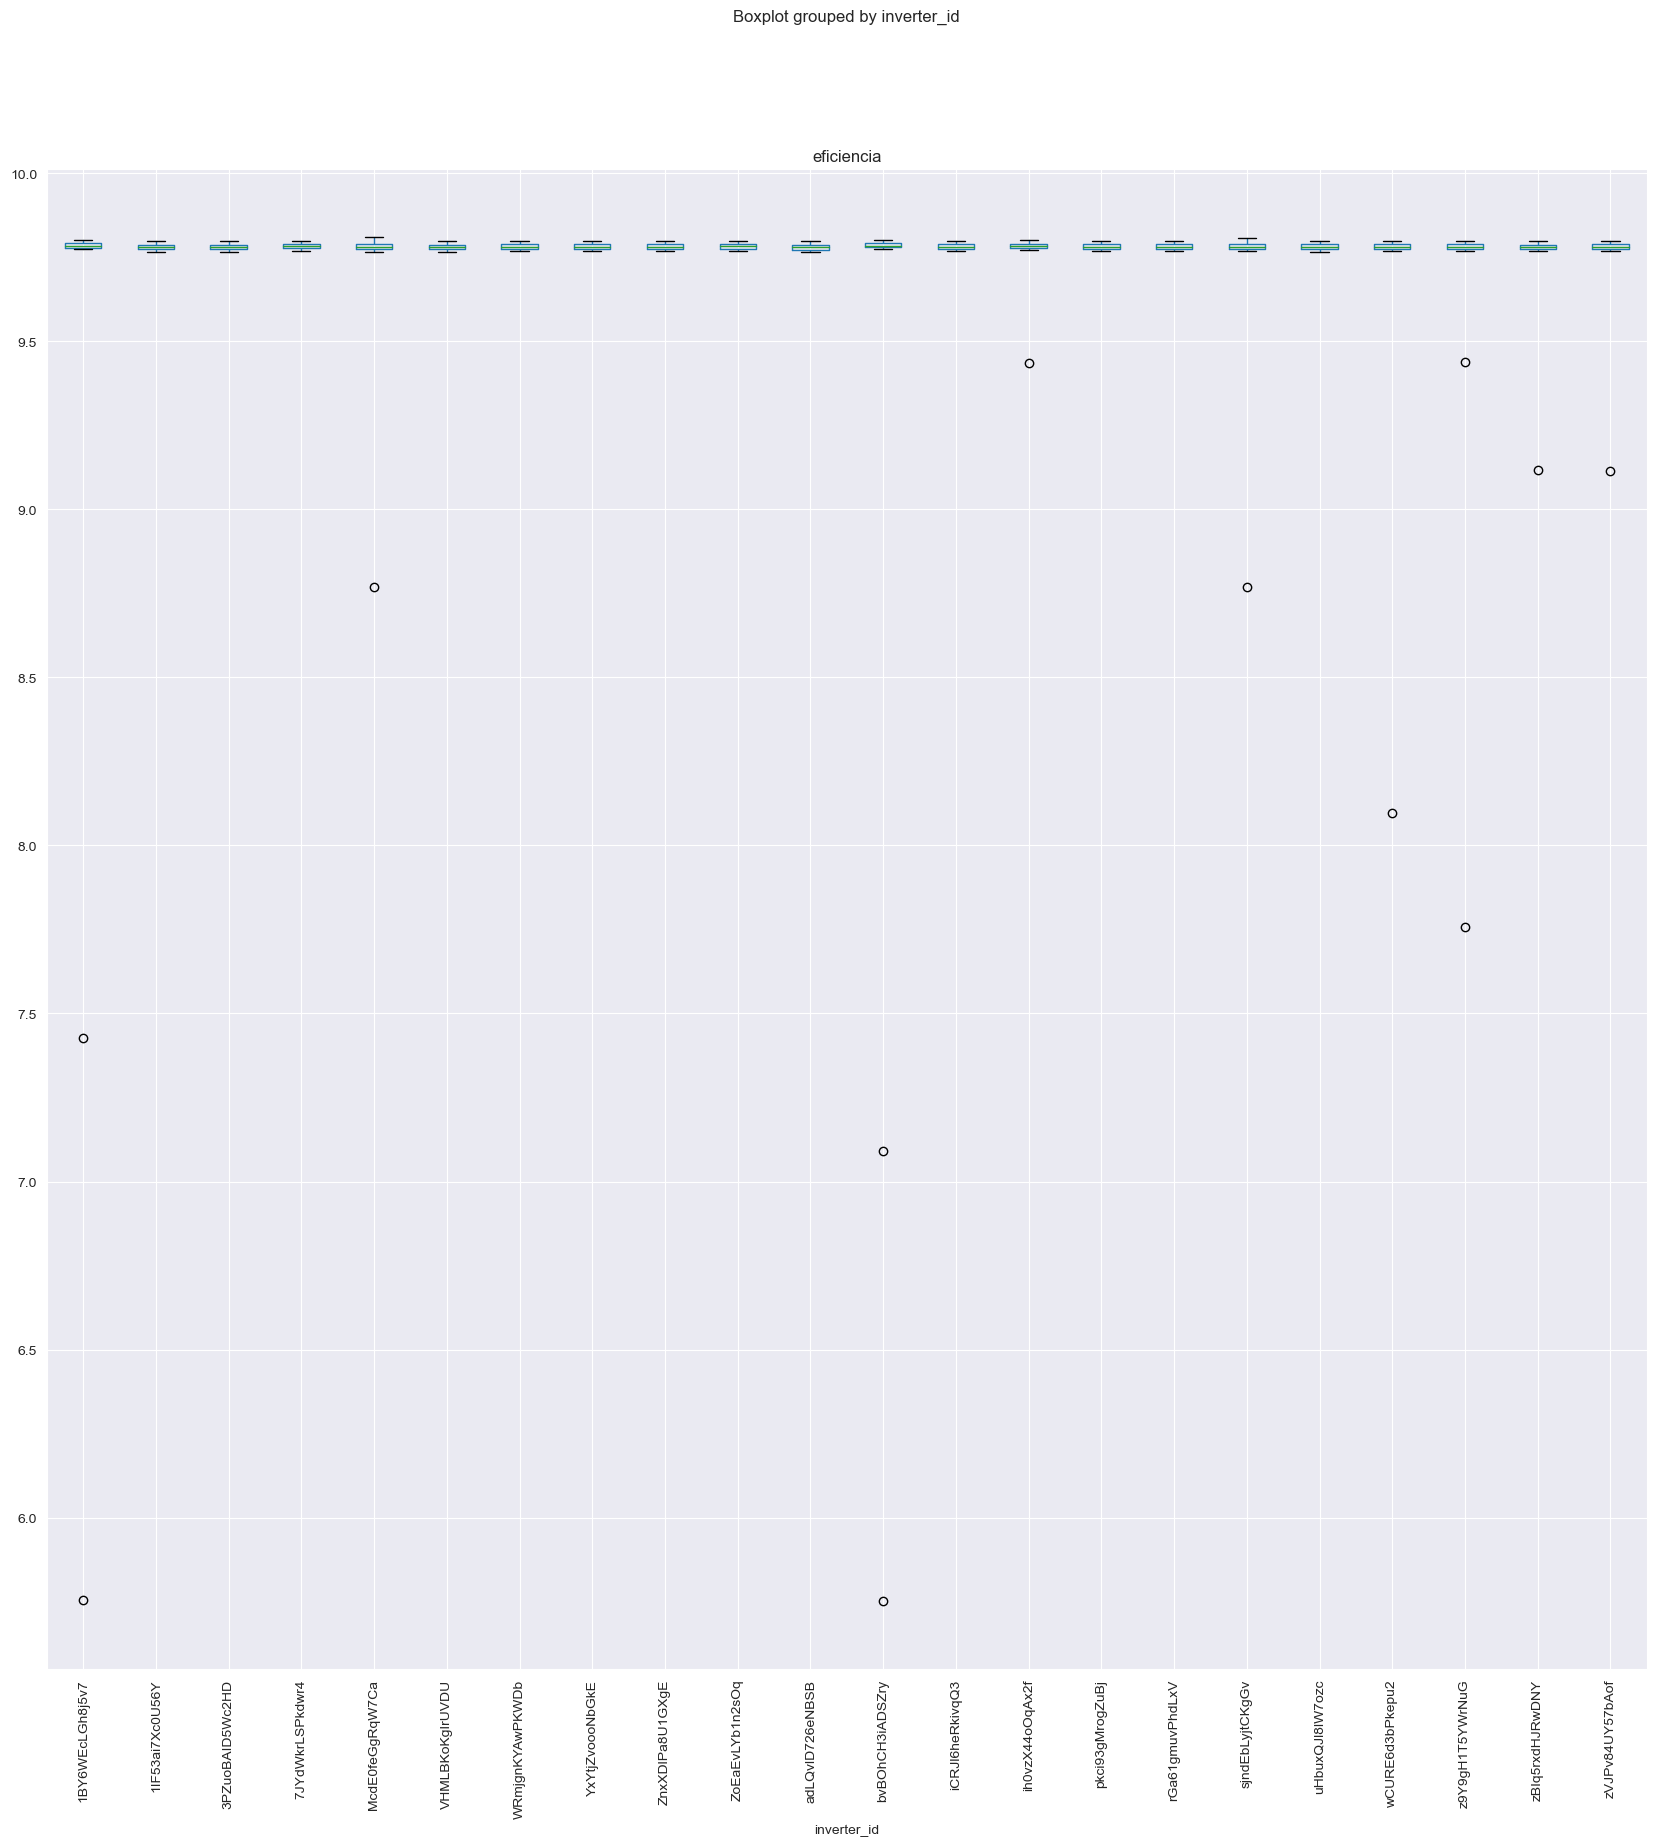

In [86]:
temp.groupby(['inverter_id','date'], as_index= False).eficiencia.mean().boxplot(column='eficiencia', by='inverter_id',figsize=(20,20))
plt.xticks(rotation=90);

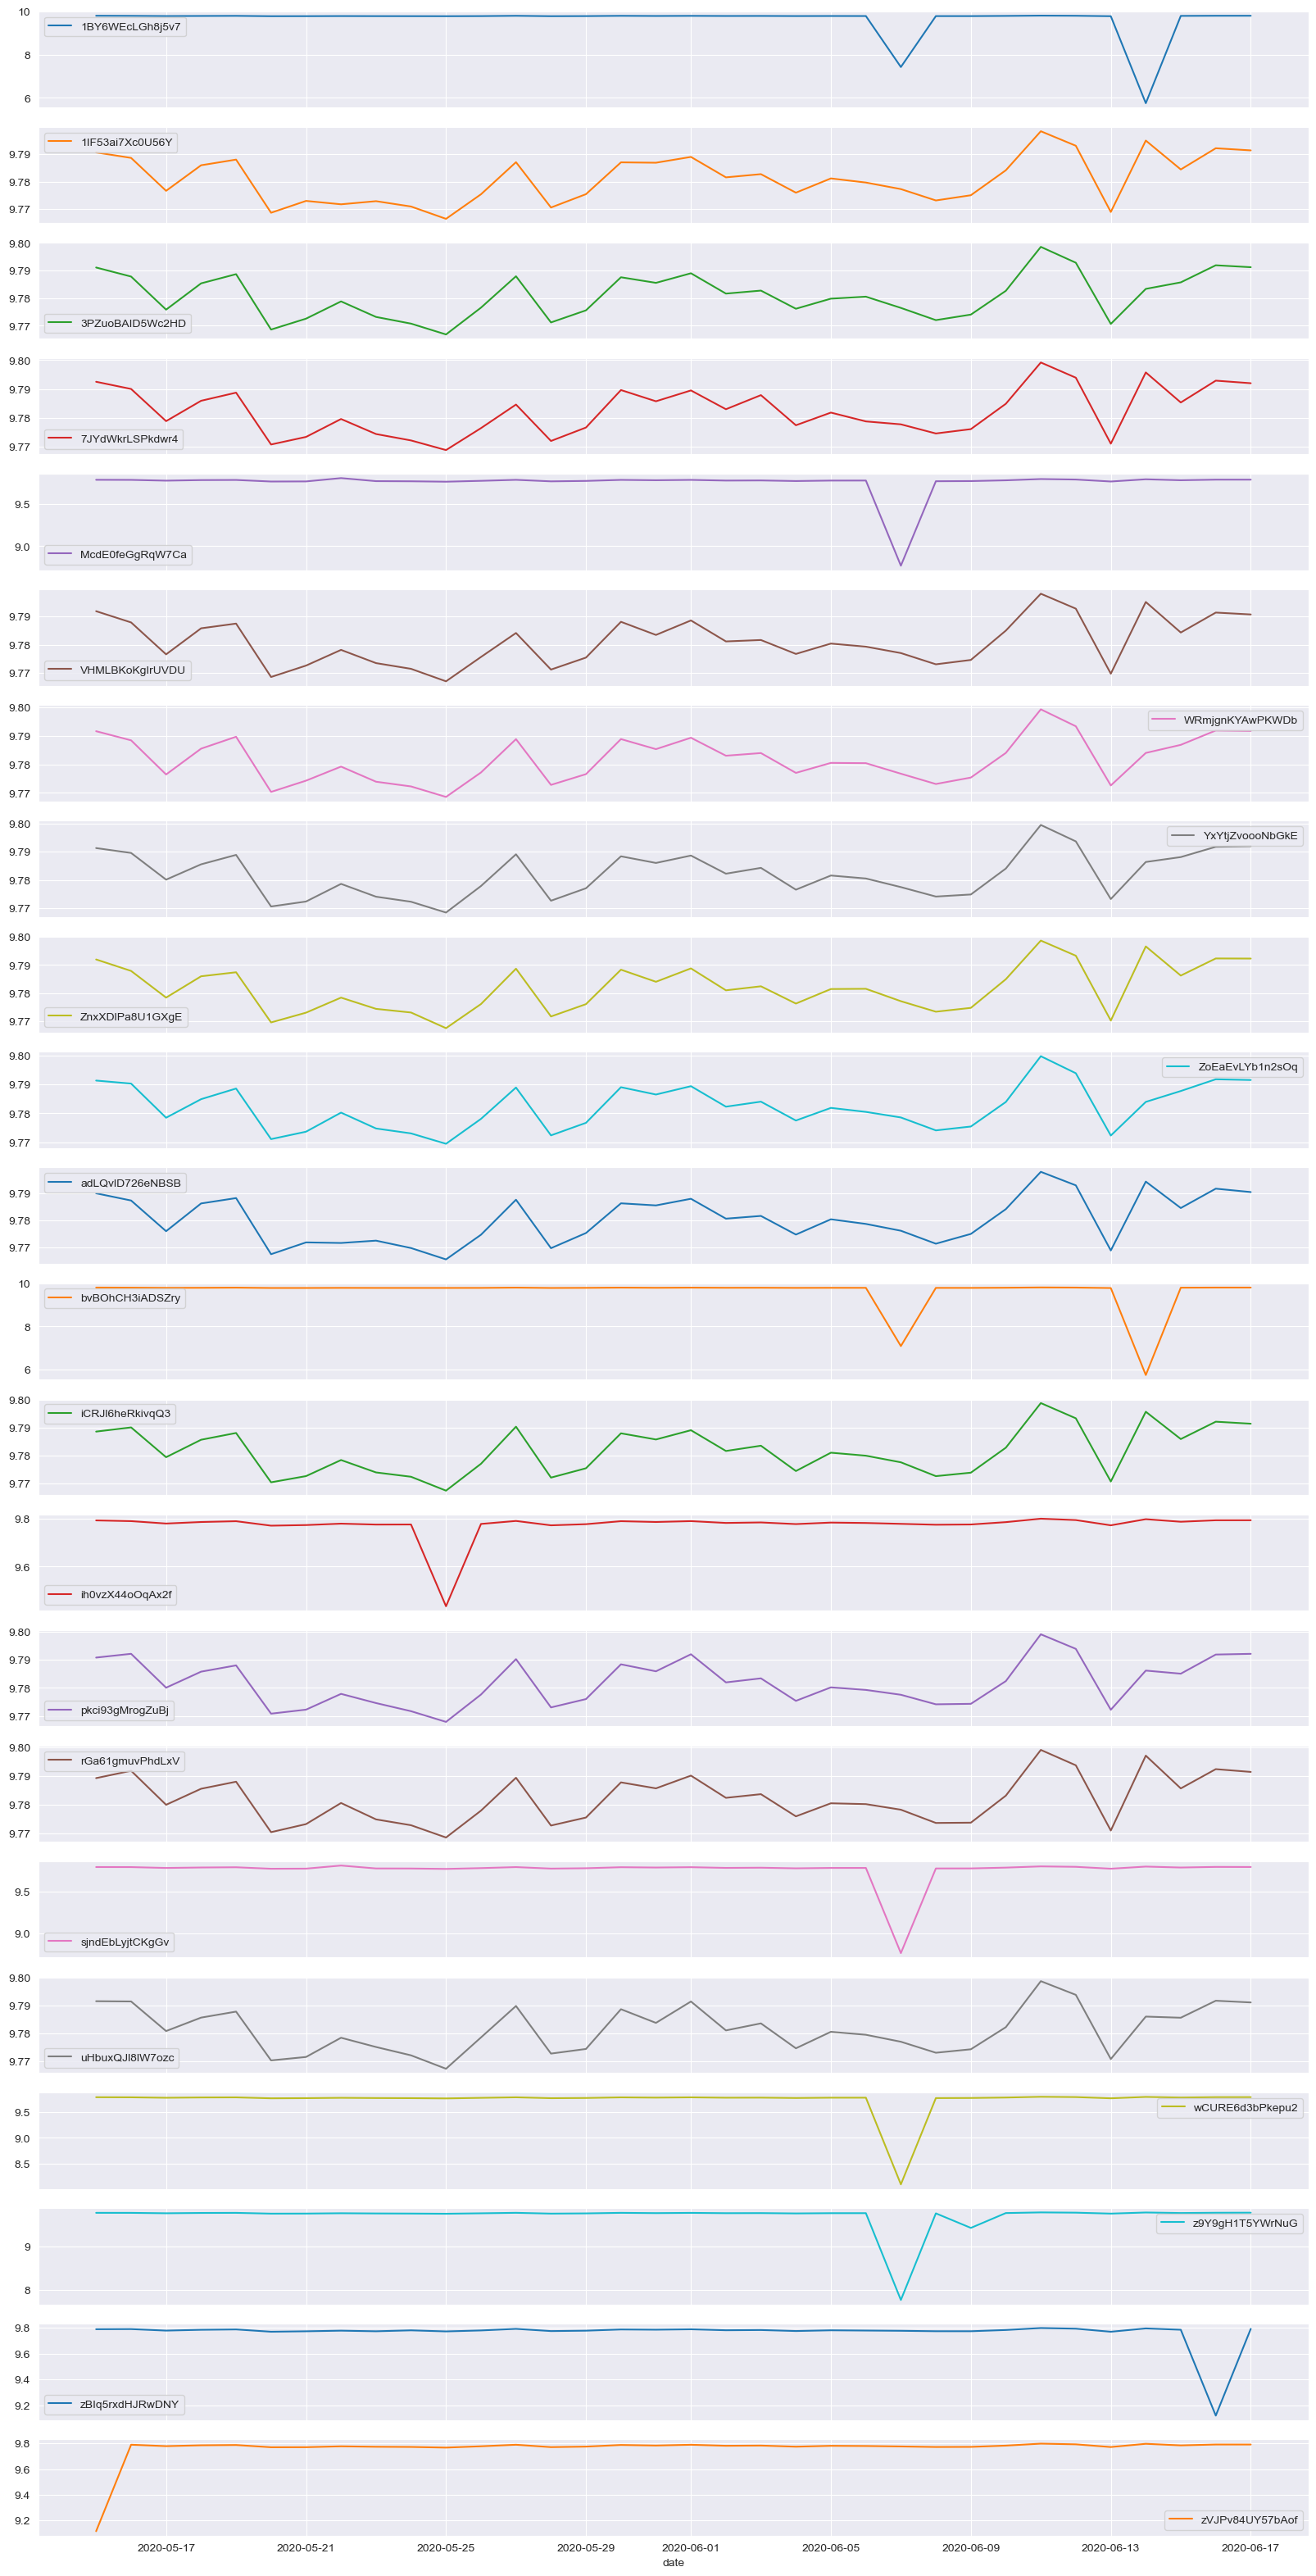

In [83]:
temp.groupby(['inverter_id','date']).eficiencia.mean().unstack(level=0).plot(subplots=True, sharex=True,figsize=(20,40));

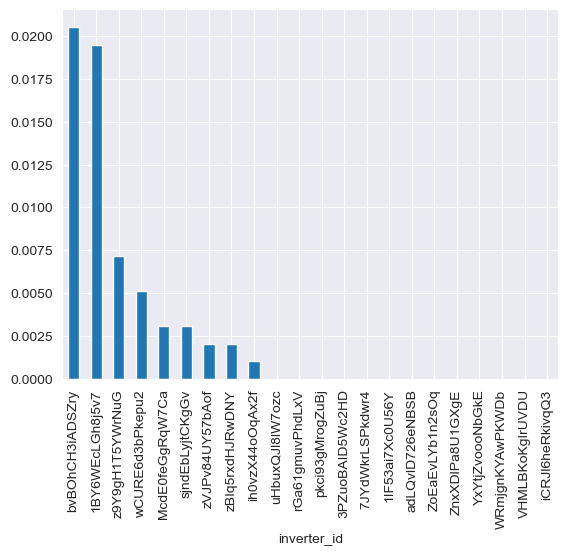

In [88]:
temp.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending=False).plot.bar();